In [2]:
#load file info:
import json
import matplotlib.pyplot as plt

def analyse_file(data, name):
    # Separate the data by measurement type
    duration_data = [op for op in data if op['m_type'] == 'Duration']
    output_size_data = [op for op in data if op['m_type'] == 'OutputSize']
    dispatch_size_data = [op for op in data if op['m_type'] == 'DispatchSize']

    # Function to process data for plotting
    def process_data(data):
        for operation in data:
            operation['value'] = operation['count'] * operation['mean']
        
        sorted_operations = sorted(data, key=lambda x: x['value'], reverse=True)
        
        labels = [f"{op['label']} (Count: {op['count']})" for op in sorted_operations]
        values = [op['value'] for op in sorted_operations]
        total_sum = sum(values)
        
        # Print the operations along with their values
        print(f"Total sum for {data[0]['m_type']}: {total_sum}")
        print(f"Operations sorted by total {data[0]['m_type'].lower()} for {data[0]['m_type']}:")
        for operation in sorted_operations:
            print(f"Operation: {operation['label']}, {data[0]['m_type']}: {operation['value']}, Count: {operation['count']} Perc:{operation['value']/total_sum:.2%}")
        
        return labels, values

    # Process data for each measurement type
    duration_labels, duration_values = process_data(duration_data)
    output_size_labels, output_size_values = process_data(output_size_data)
    dispatch_size_labels, dispatch_size_values = process_data(dispatch_size_data)

    # Function to plot data
    def plot_data(labels, values, title):
        plt.figure(figsize=(10, 8))
        plt.barh(labels, values, color='skyblue')
        plt.grid()
        plt.xscale('log')
        plt.xlabel('Value')
        plt.ylabel('Operation')
        plt.title(title)
        plt.gca().invert_yaxis()  # To have the longest value at the top
        plt.show()

    # Plot data for each measurement type
    plot_data(duration_labels, duration_values, f'WebGpu Shader-Invocation Durations while simulating {name} (Duration)')
    plot_data(output_size_labels, output_size_values, f'WebGpu Shader-Invocation Output Sizes while simulating {name} (OutputSize)')
    plot_data(dispatch_size_labels, dispatch_size_values, f'WebGpu Shader-Invocation Dispatch Sizes while simulating {name} (DispatchSize)')

Total sum for Duration: 12.833173503999998
Operations sorted by total duration for Duration:
Operation: matmul5, dtype:F32, Duration: 12.545227775999999, Count: 131 Perc:97.76%
Operation: copy3d d1: 2055, d2: 2055, d3: 10, dtype:F32, Duration: 0.146542592, Count: 131 Perc:1.14%
Operation: copy3d d1: 2055, d2: 2048, d3: 10, dtype:F32, Duration: 0.139395072, Count: 131 Perc:1.09%
Operation: unary_inplace_contiguoes op:SetZero, dtype:F32, pipeline:UnaryInplaceContiguous, Duration: 0.002008064, Count: 2 Perc:0.02%
Total sum for OutputSize: 18859443368.0
Operations sorted by total outputsize for OutputSize:
Operation: matmul5, dtype:F32, OutputSize: 7705499648.0, Count: 131 Perc:40.86%
Operation: copy3d d1: 2055, d2: 2048, d3: 10, dtype:F32, OutputSize: 5537464320.0, Count: 131 Perc:29.36%
Operation: copy3d d1: 2055, d2: 2055, d3: 10, dtype:F32, OutputSize: 5532162750.0, Count: 131 Perc:29.33%
Operation: unary_inplace_contiguoes op:SetZero, dtype:F32, pipeline:UnaryInplaceContiguous, Output

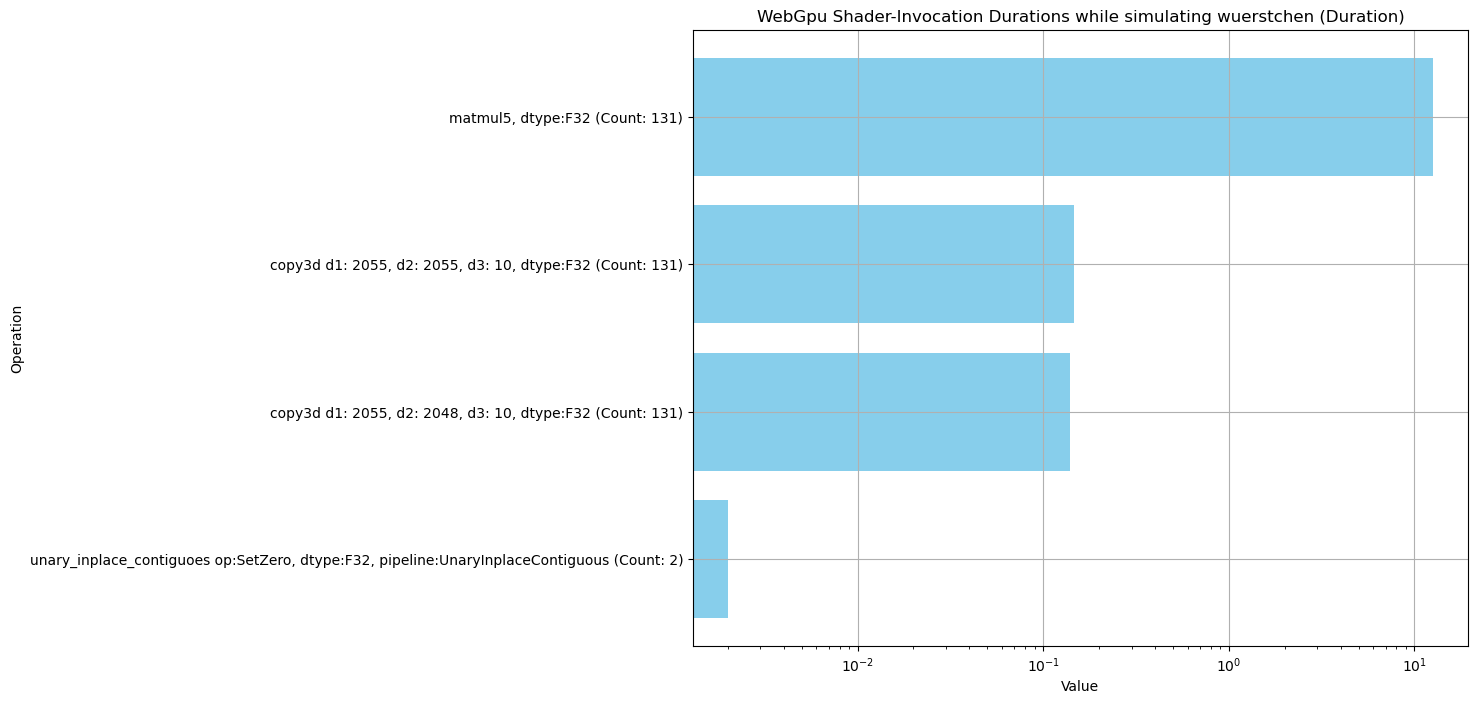

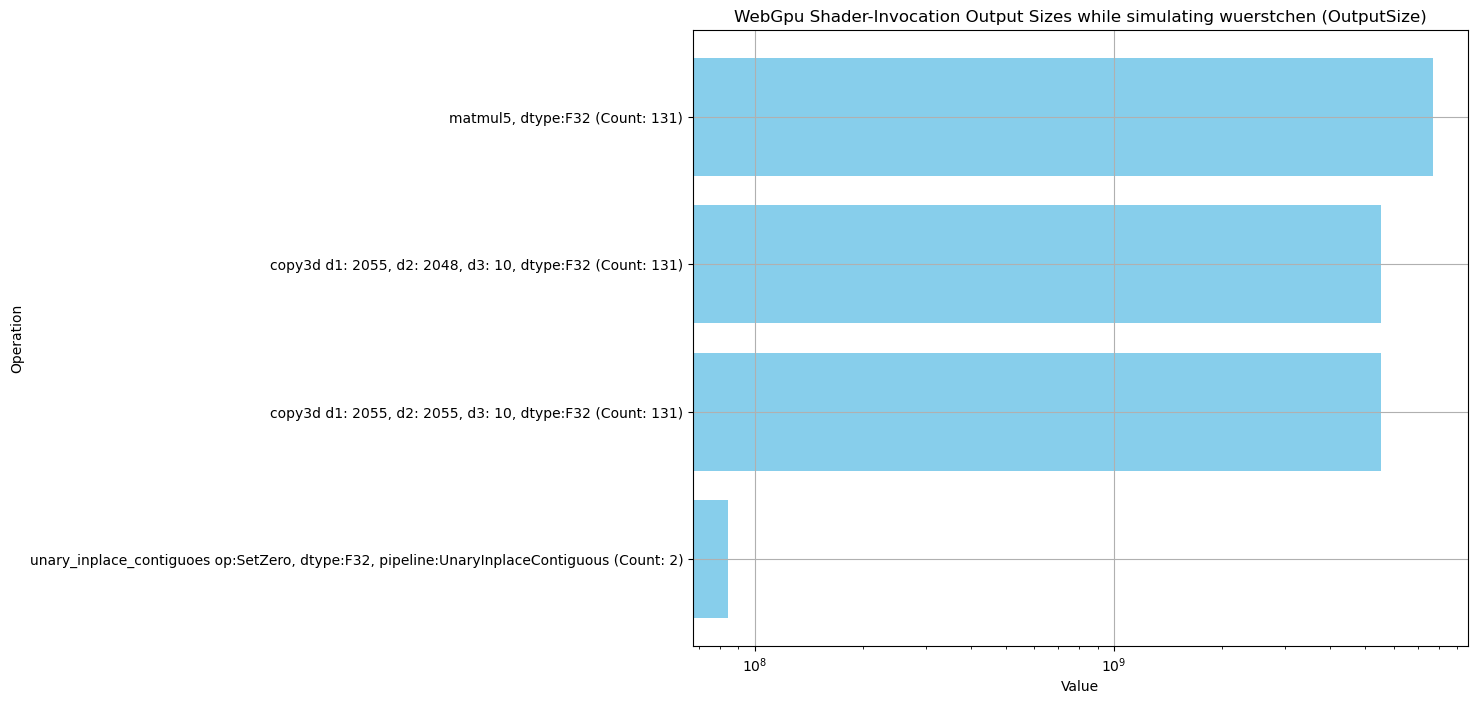

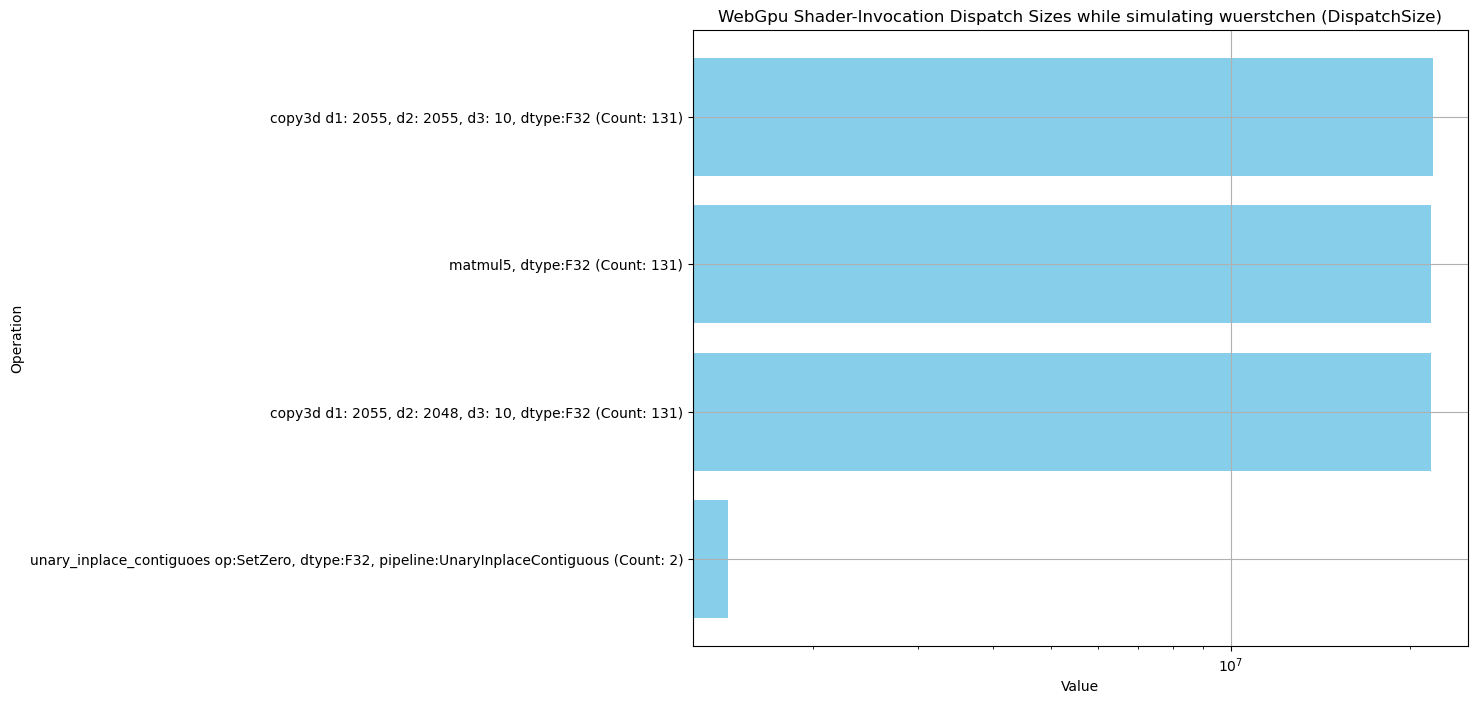

In [7]:
# Load JSON data from a file
with open('candle-core\wgpu_bench2048.json', 'r') as file:
    data = json.load(file)

analyse_file(data,"wuerstchen")

Total sum for Duration: 140.65914675199997
Operations sorted by total duration for Duration:
Operation: matmul5, dtype:F32, Duration: 46.27086438400001, Count: 9140 Perc:32.90%
Operation: softmax, dtype:F32, reduction: 4173, dest_size: 40960, Duration: 25.202419712, Count: 96 Perc:17.92%
Operation: conv2d, kernel:[640, 320, 2, 2]/[1280, 4, 2, 1], input: [1, 320, 128, 128]/[1, 320, 128, 128], dtype:F32, Duration: 10.960125952, Count: 12 Perc:7.79%
Operation: conv2d, kernel:[1, 1, 3, 3]/[9, 9, 3, 1], input: [2, 1, 24, 24]/[2, 1, 24, 24], dtype:F32, Duration: 9.185318912, Count: 589824 Perc:6.53%
Operation: copy2d d1: 2, d2: 576, dtype:F32, Duration: 7.086319616, Count: 589824 Perc:5.04%
Operation: conv2d, kernel:[1, 1, 3, 3]/[9, 9, 3, 1], input: [1, 1, 32, 32]/[1, 1, 32, 32], dtype:F32, Duration: 5.8768670720000005, Count: 430080 Perc:4.18%
Operation: copy2d d1: 1, d2: 1024, dtype:F32, Duration: 5.280214016, Count: 430080 Perc:3.75%
Operation: conv2d, kernel:[1280, 640, 2, 2]/[2560, 4, 2

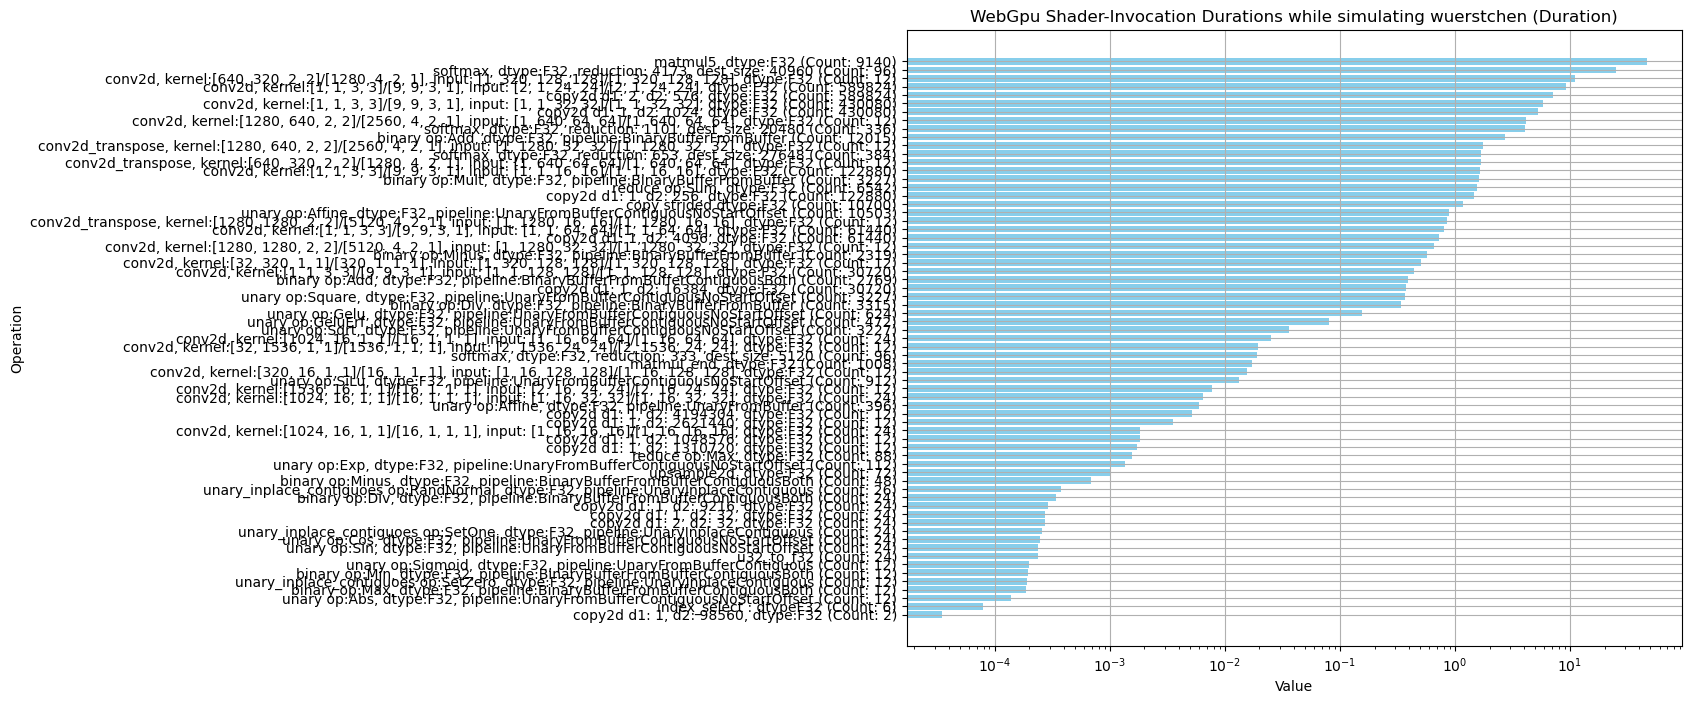

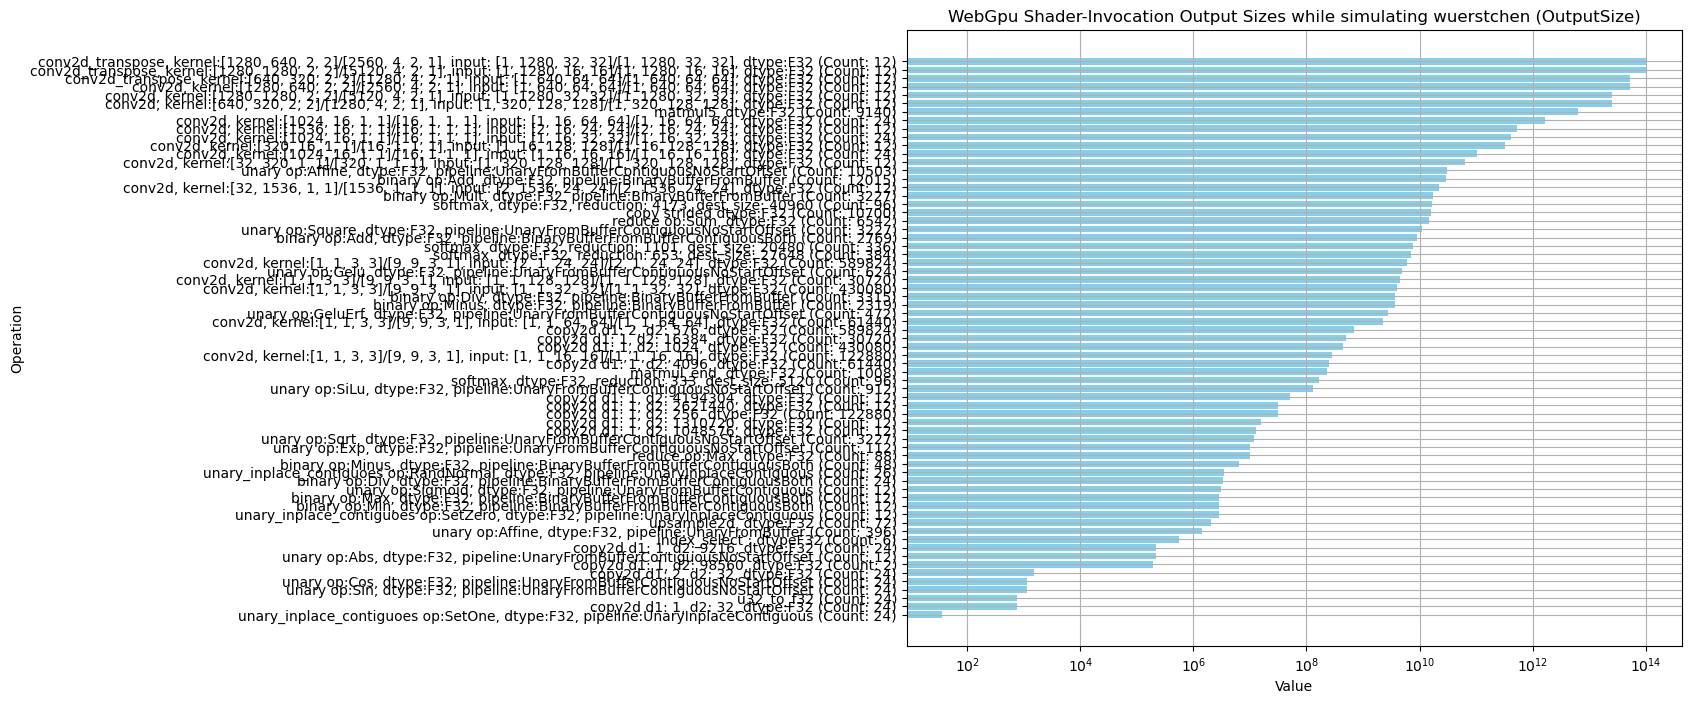

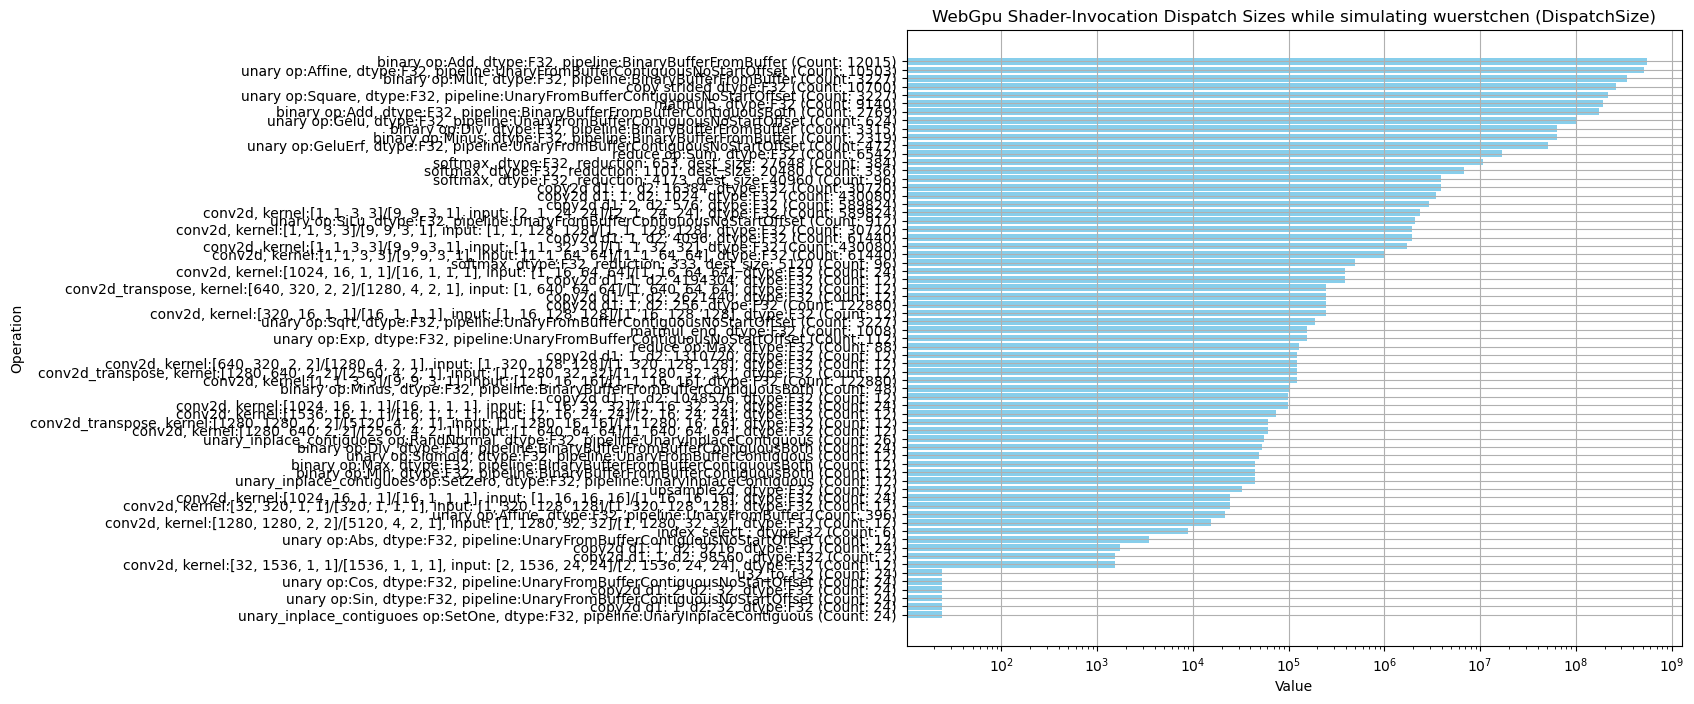

In [39]:
# Load JSON data from a file
with open('candle-examples\wgpu_infowuerstchen4_small.json', 'r') as file:
    data = json.load(file)

analyse_file(data,"wuerstchen")

Total sum for Duration: 13.088389056000002
Operations sorted by total duration for Duration:
Operation: matmul, dtype:F32, Duration: 12.471338944000001, Count: 14026 Perc:95.29%
Operation: binary op:Mult, dtype:F32, pipeline:BinaryBufferFromBuffer, Duration: 0.164833248, Count: 12240 Perc:1.26%
Operation: copy2d dtype:F32, Duration: 0.128648224, Count: 12216 Perc:0.98%
Operation: binary op:Add, dtype:F32, pipeline:BinaryBufferFromBufferContiguousBoth, Duration: 0.055942144, Count: 6120 Perc:0.43%
Operation: rms_norm, dtype:F32, Duration: 0.037868512, Count: 3315 Perc:0.29%
Operation: copy strided dtype:F32, Duration: 0.037289984, Count: 3048 Perc:0.28%
Operation: unary op:Affine, dtype:F32, pipeline:UnaryFromBufferContiguous, Duration: 0.029350943999999997, Count: 3060 Perc:0.22%
Operation: unary op:Exp, dtype:F32, pipeline:UnaryFromBufferContiguous, Duration: 0.026674176, Count: 3060 Perc:0.20%
Operation: binary op:Minus, dtype:F32, pipeline:BinaryBufferFromBufferContiguousBoth, Durat

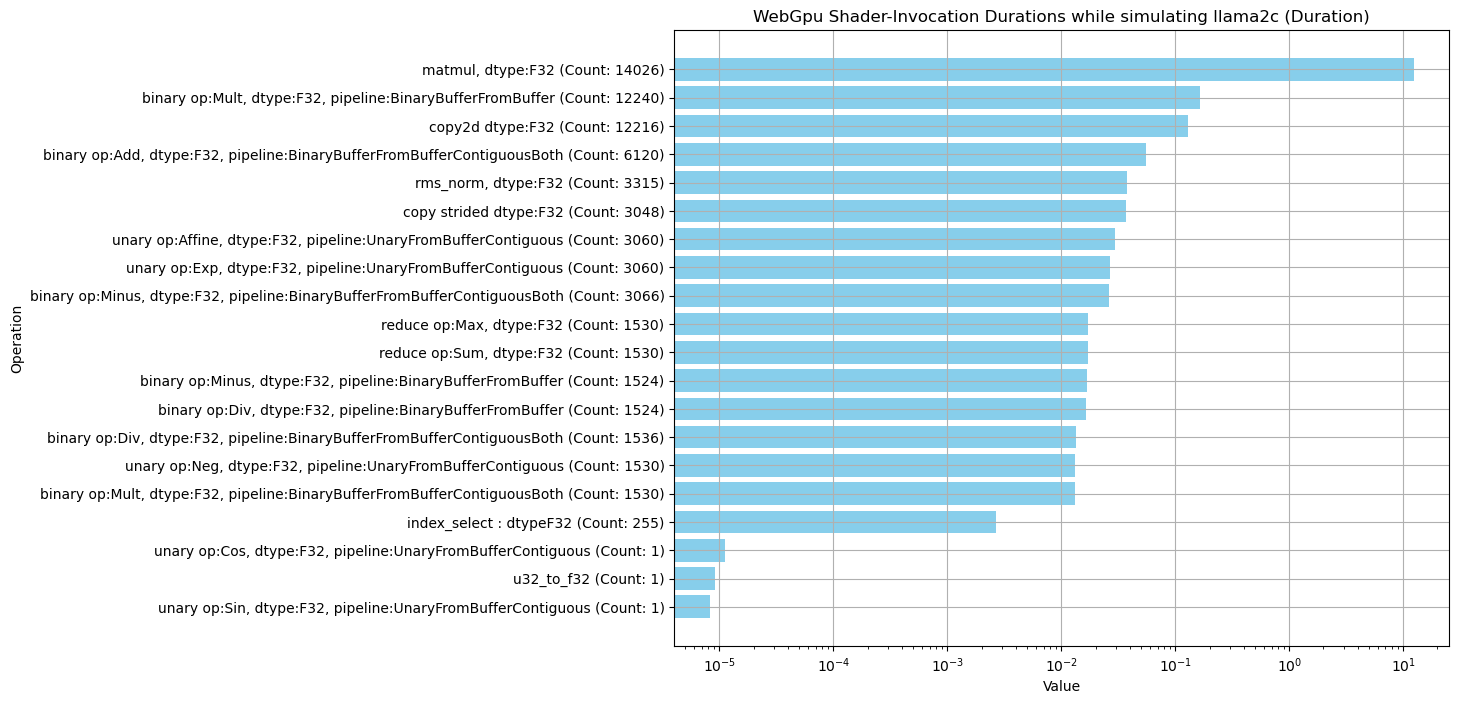

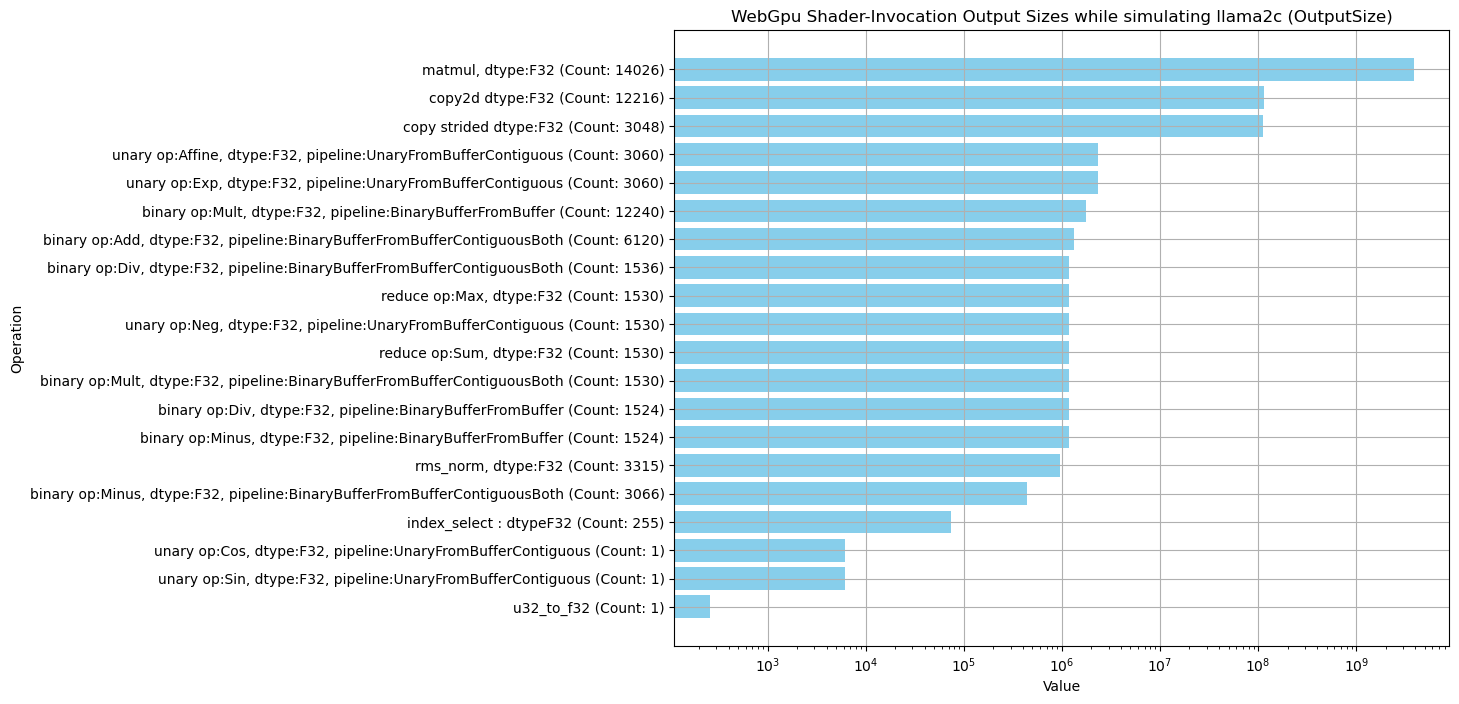

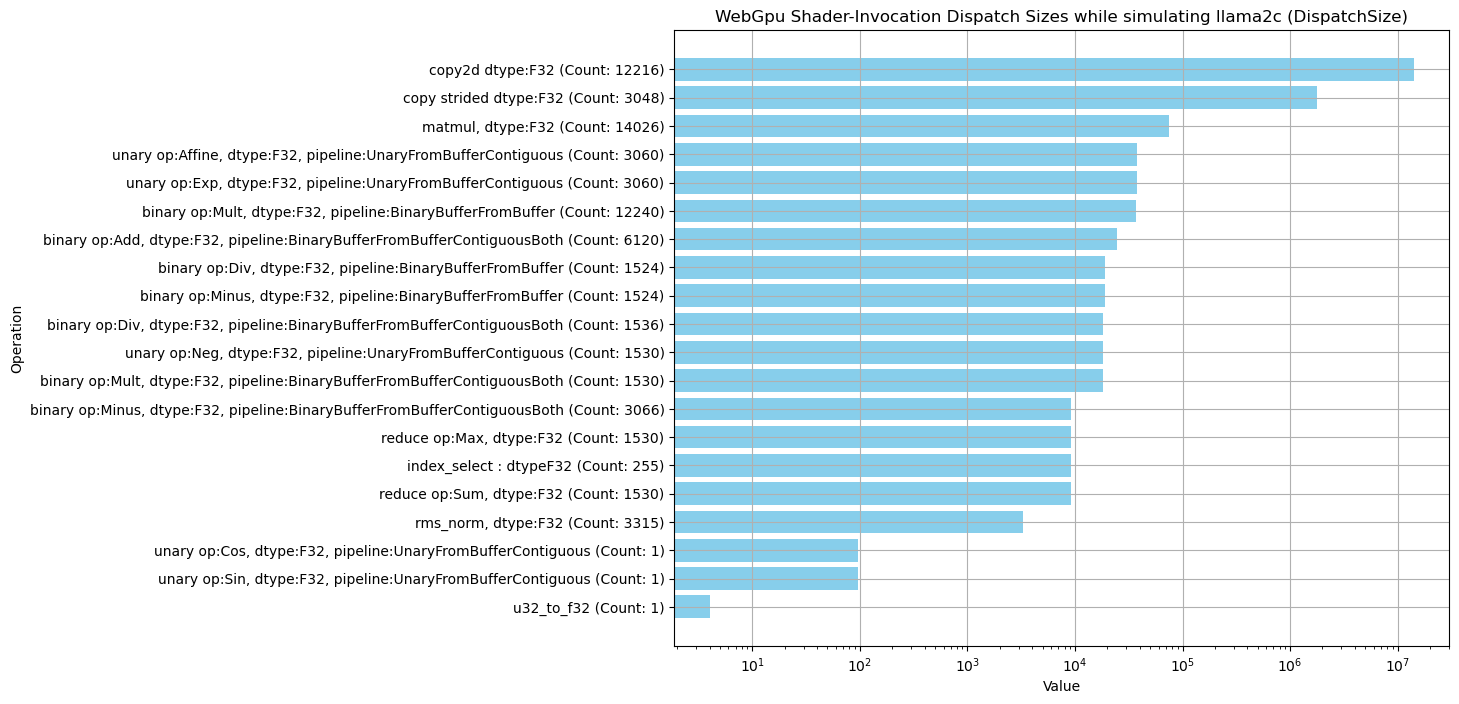

In [2]:
# Load JSON data from a file
with open('candle-examples\wgpu_infollama2-c_small.json', 'r') as file:
    data = json.load(file)

analyse_file(data,"llama2c")

Total sum for Duration: 1.432100768
Operations sorted by total duration for Duration:
Operation: matmul1end, dtype:F32, Duration: 0.5780541760000001, Count: 14026 Perc:40.36%
Operation: binary op:Mult, dtype:F32, pipeline:BinaryBufferFromBuffer, Duration: 0.23009388800000002, Count: 12240 Perc:16.07%
Operation: copy2d dtype:F32, Duration: 0.177184704, Count: 12216 Perc:12.37%
Operation: binary op:Add, dtype:F32, pipeline:BinaryBufferFromBufferContiguousBoth, Duration: 0.079201312, Count: 6120 Perc:5.53%
Operation: rms_norm, dtype:F32, Duration: 0.048761856, Count: 3315 Perc:3.40%
Operation: unary op:Affine, dtype:F32, pipeline:UnaryFromBufferContiguous, Duration: 0.045529024, Count: 3060 Perc:3.18%
Operation: copy strided dtype:F32, Duration: 0.044561376, Count: 3048 Perc:3.11%
Operation: binary op:Minus, dtype:F32, pipeline:BinaryBufferFromBufferContiguousBoth, Duration: 0.040941568, Count: 3066 Perc:2.86%
Operation: unary op:Exp, dtype:F32, pipeline:UnaryFromBufferContiguous, Duratio

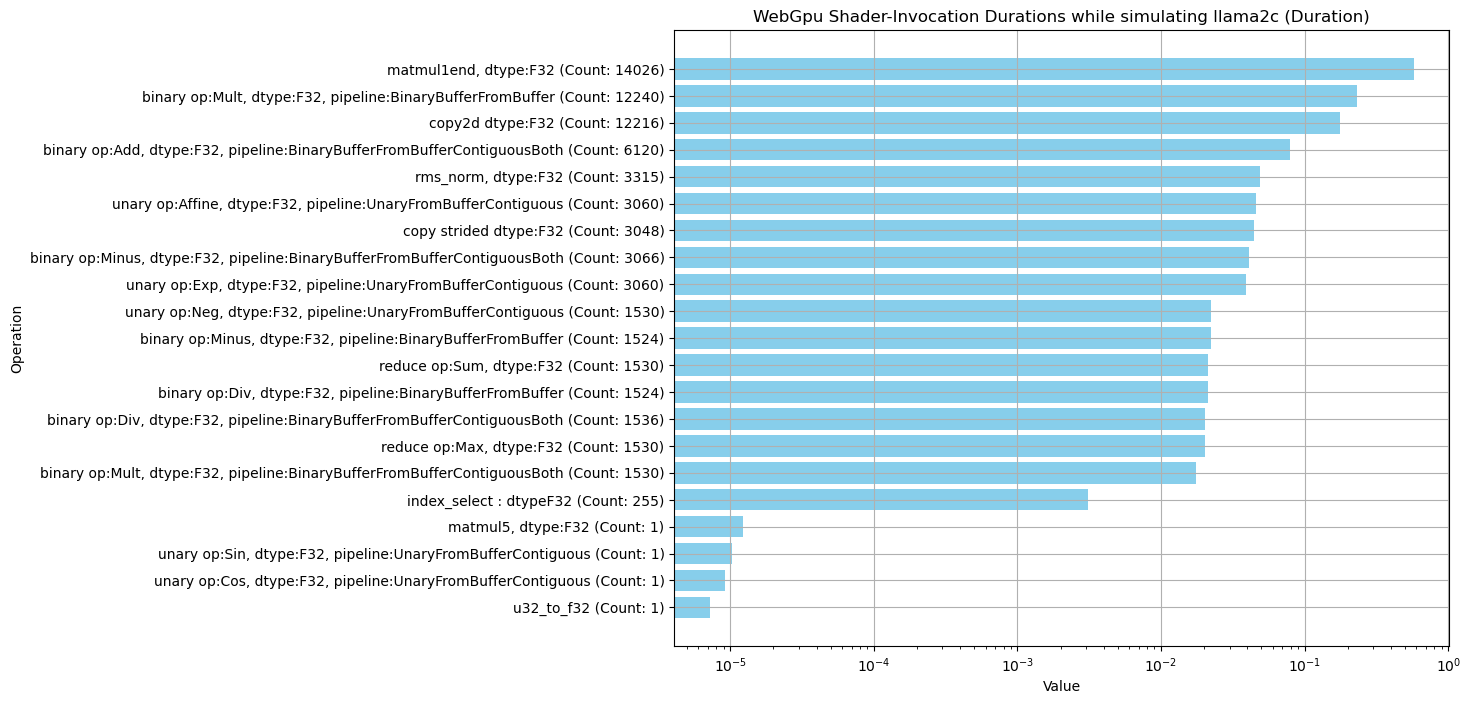

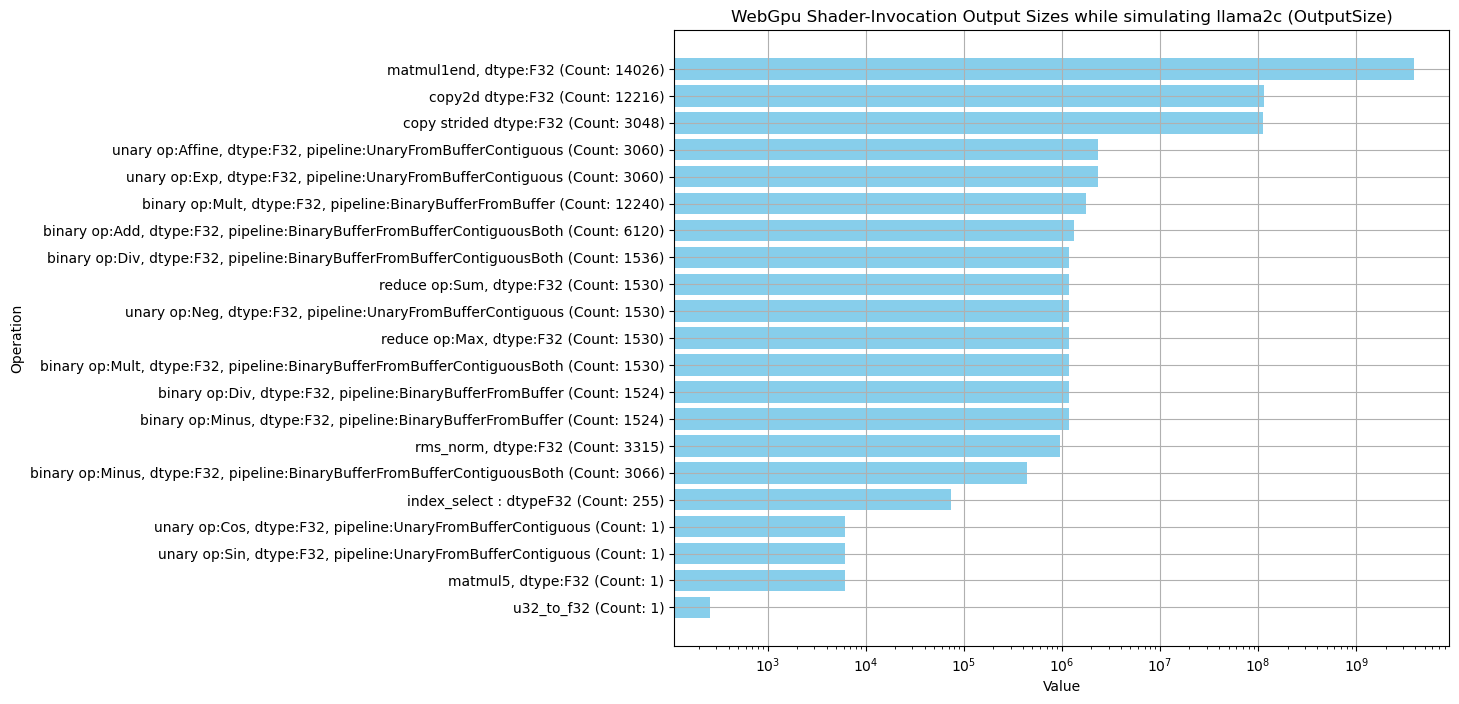

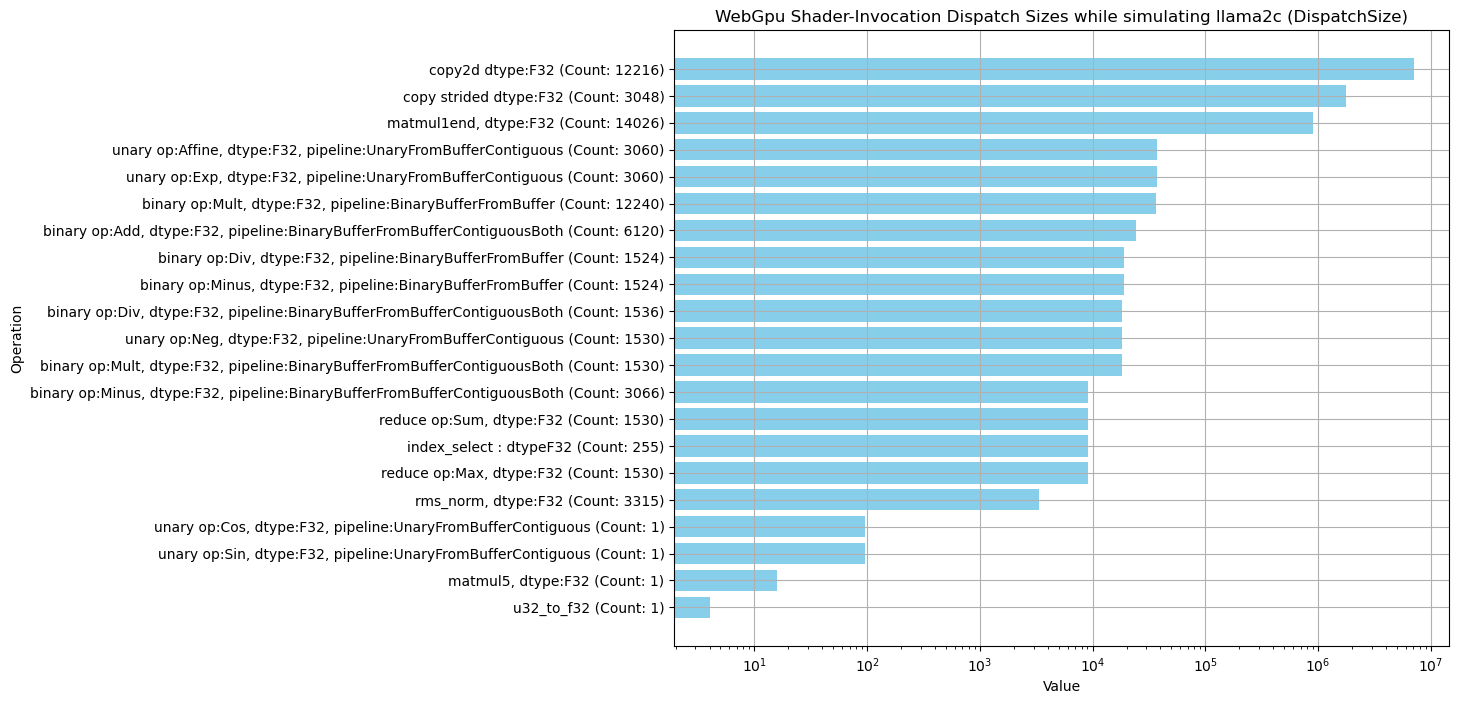

In [3]:
# Load JSON data from a file
with open('candle-examples\wgpu_infollama3-c_small.json', 'r') as file:
    data = json.load(file)

analyse_file(data,"llama2c")

Total sum for Duration: 9.591851903999993
Operations sorted by total duration for Duration:
Operation: matmul5, dtype:F32, Duration: 2.819538784, Count: 416 Perc:29.40%
Operation: matmul1end, dtype:F32, Duration: 1.6715929600000001, Count: 274 Perc:17.43%
Operation: conv2d, kernel:F32 dtype:[1280, 1280, 3, 3], Duration: 1.047871488, Count: 20 Perc:10.92%
Operation: conv2d, kernel:F32 dtype:[640, 640, 3, 3], Duration: 0.667067392, Count: 8 Perc:6.95%
Operation: conv2d, kernel:F32 dtype:[320, 320, 1, 1], Duration: 0.559934464, Count: 10 Perc:5.84%
Operation: conv2d, kernel:F32 dtype:[1280, 2560, 3, 3], Duration: 0.441136128, Count: 5 Perc:4.60%
Operation: conv2d, kernel:F32 dtype:[320, 320, 3, 3], Duration: 0.42634752, Count: 8 Perc:4.44%
Operation: conv2d, kernel:F32 dtype:[320, 640, 3, 3], Duration: 0.239514624, Count: 2 Perc:2.50%
Operation: conv2d, kernel:F32 dtype:[640, 640, 1, 1], Duration: 0.239476736, Count: 10 Perc:2.50%
Operation: conv2d, kernel:F32 dtype:[1280, 1280, 1, 1], Du

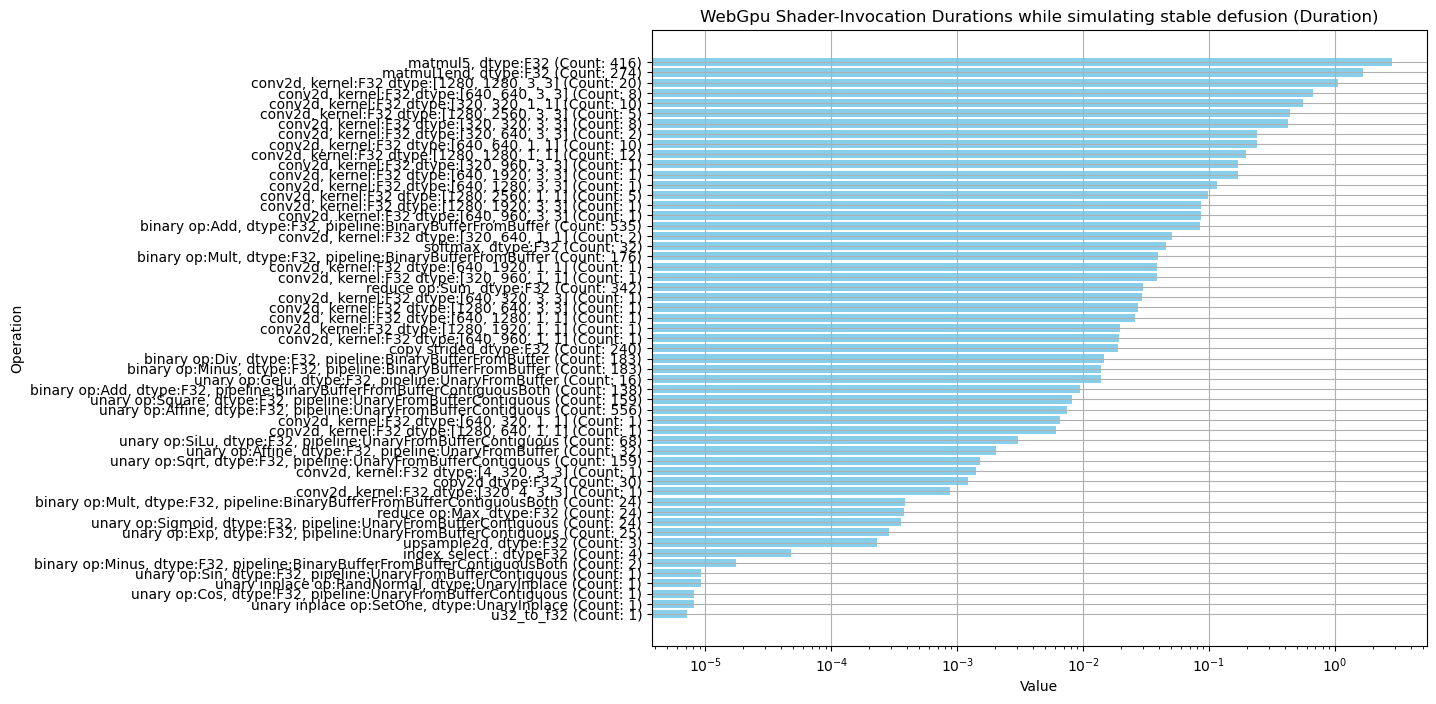

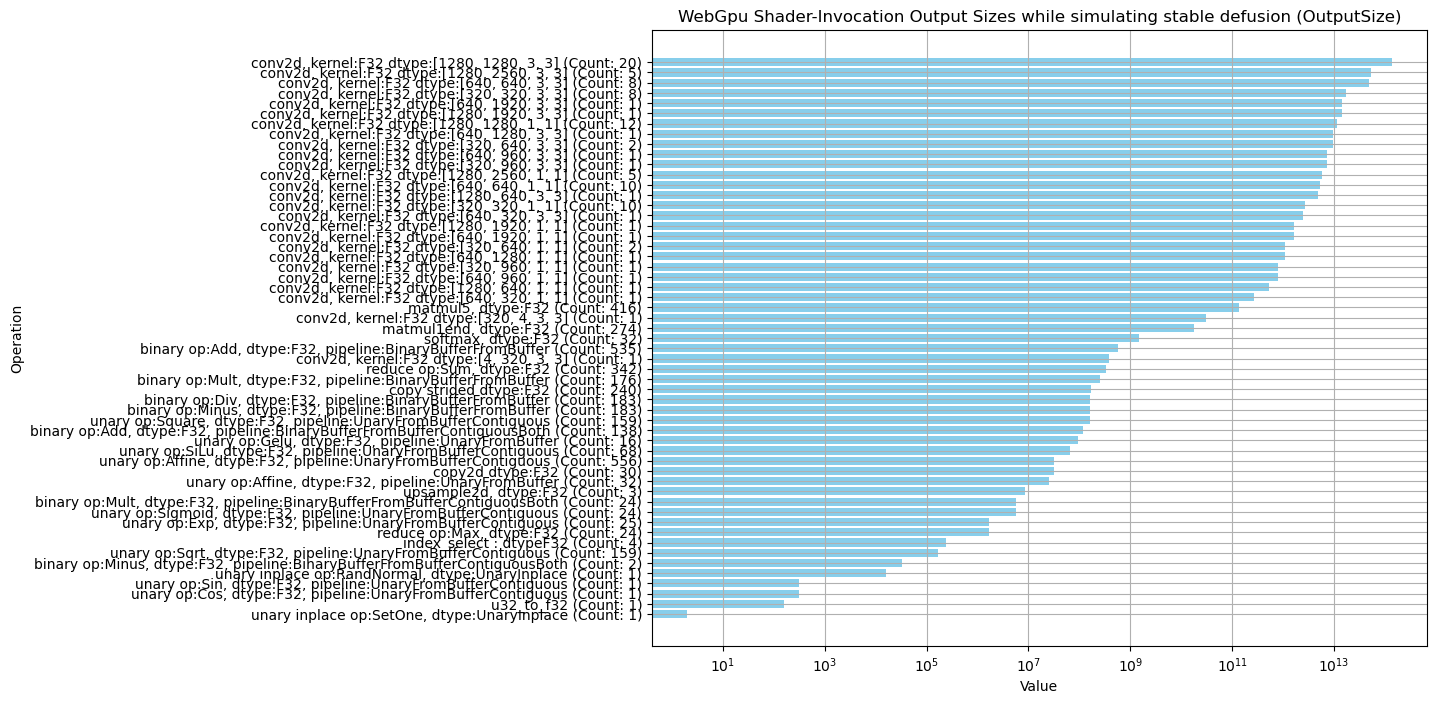

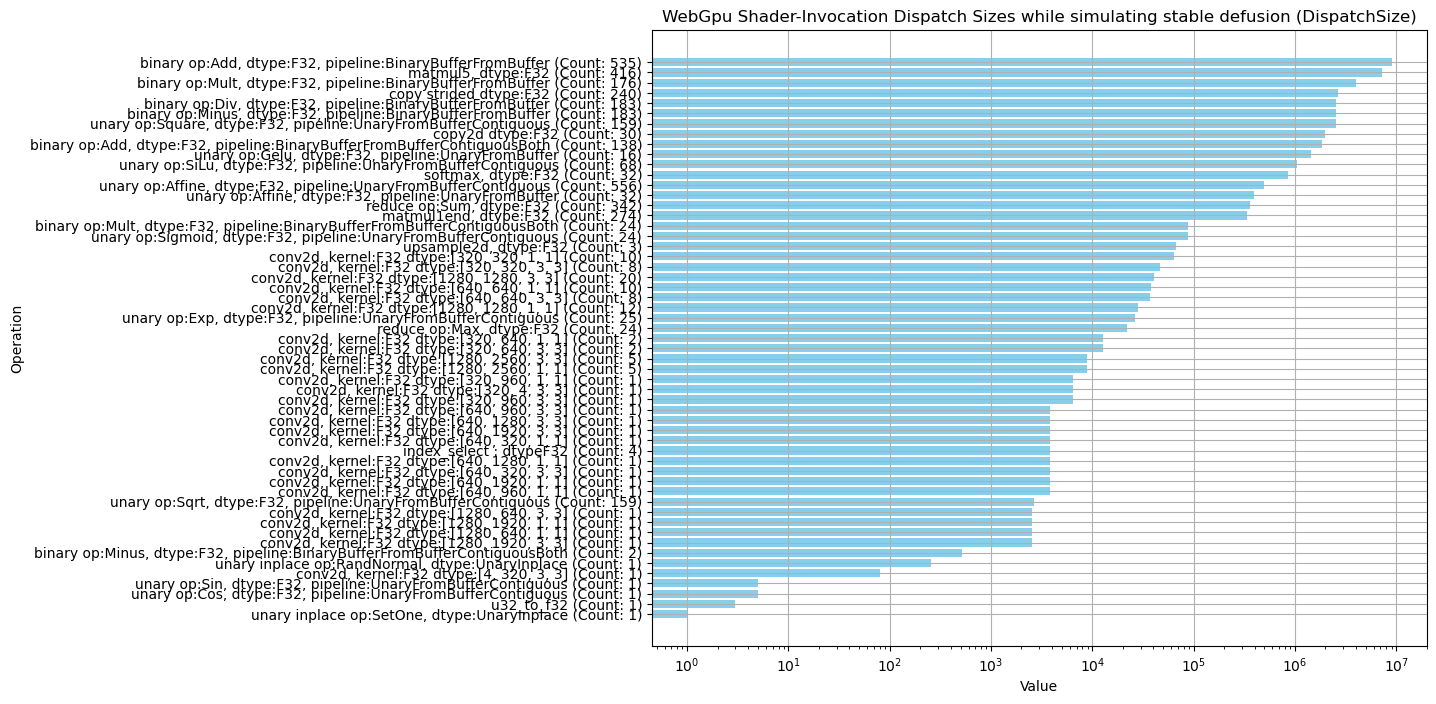

In [4]:
# Load JSON data from a file
with open('candle-examples\wgpu_infostable_defusion_small.json', 'r') as file:
    data = json.load(file)

analyse_file(data,"stable defusion")

Total sum for Duration: 10.08130048
Operations sorted by total duration for Duration:
Operation: matmul4end, dtype:F32, Duration: 10.081180671999999, Count: 68117 Perc:100.00%
Operation: unary inplace op:SetZero, dtype:UnaryInplace, Duration: 0.000119808, Count: 2 Perc:0.00%
Total sum for OutputSize: 285707601920.0
Operations sorted by total outputsize for OutputSize:
Operation: matmul4end, dtype:F32, OutputSize: 285703405568.0, Count: 68117 Perc:100.00%
Operation: unary inplace op:SetZero, dtype:UnaryInplace, OutputSize: 4196352.0, Count: 2 Perc:0.00%
Total sum for DispatchSize: 8784544.0
Operations sorted by total dispatchsize for DispatchSize:
Operation: matmul4end, dtype:F32, DispatchSize: 8718976.0, Count: 68117 Perc:99.25%
Operation: unary inplace op:SetZero, dtype:UnaryInplace, DispatchSize: 65568.0, Count: 2 Perc:0.75%


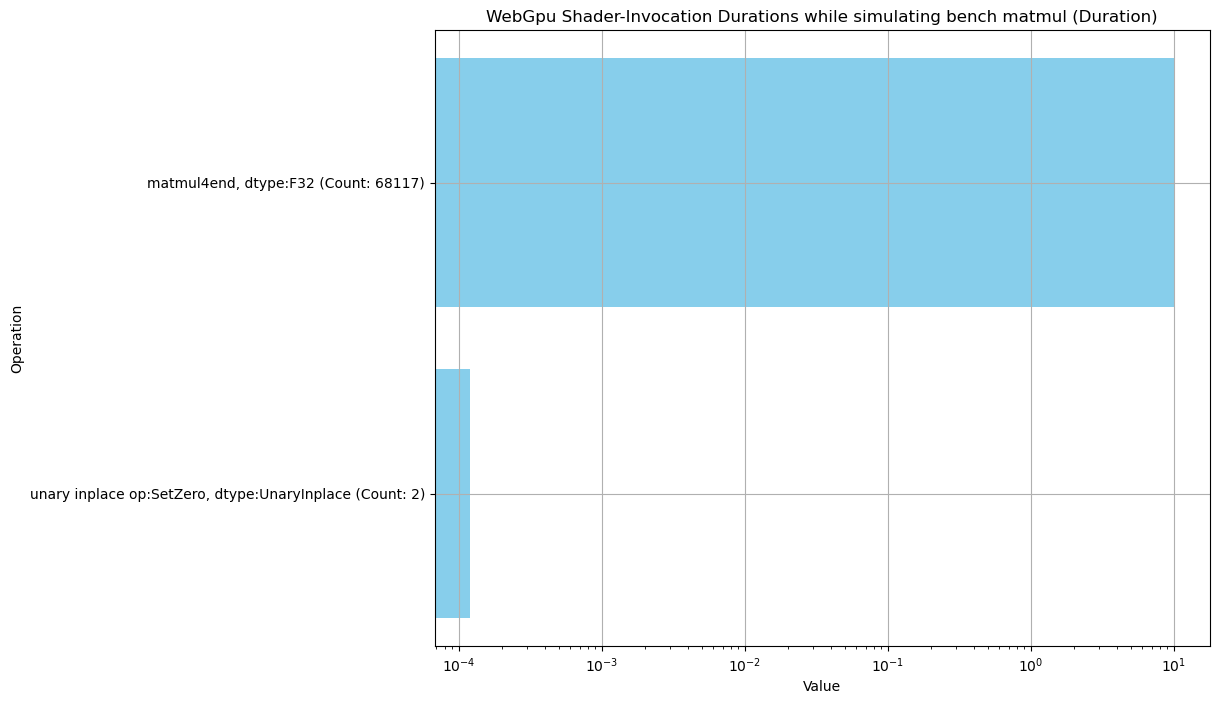

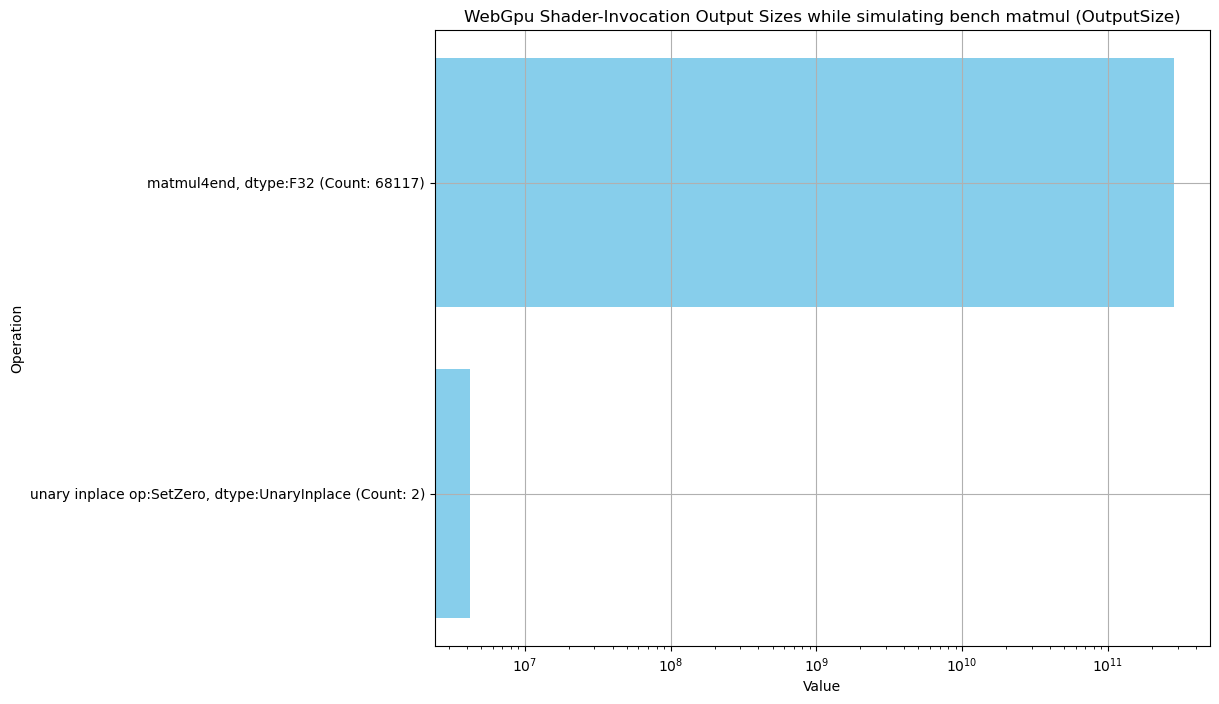

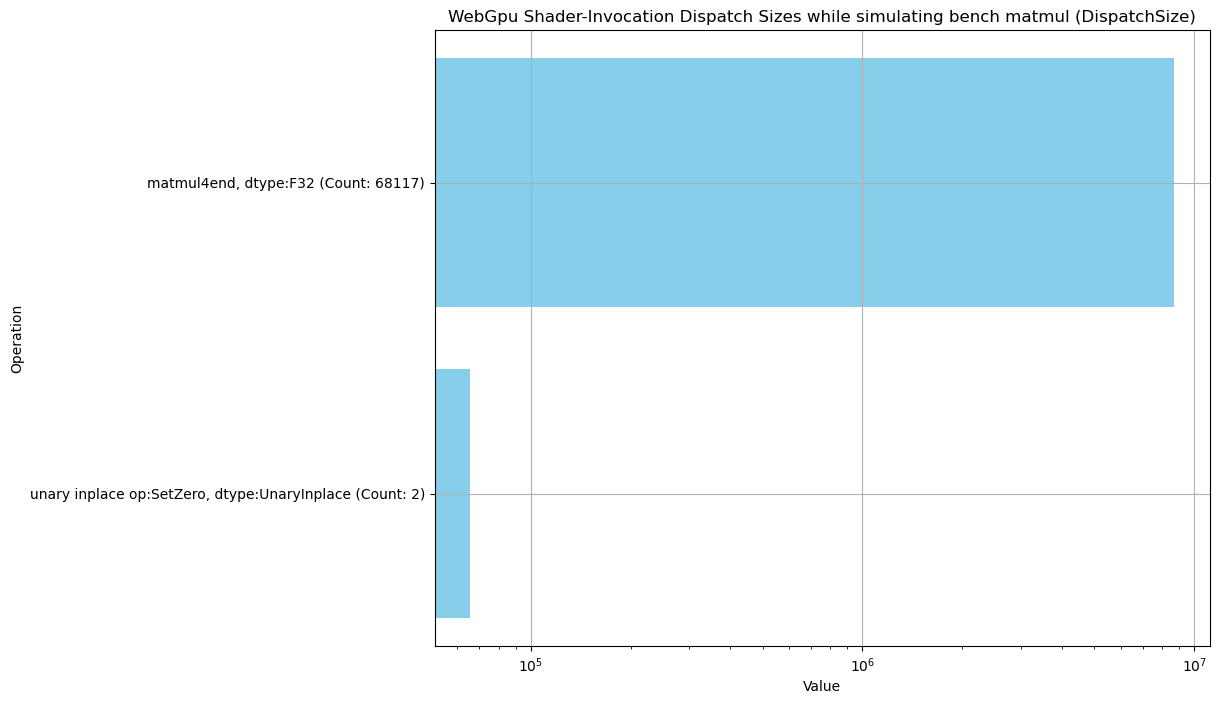

In [5]:
# Load JSON data from a file
with open('candle-core\wgpu_bench.json', 'r') as file:
    data = json.load(file)

analyse_file(data,"bench matmul")

Total sum for Duration: 10.022057984
Operations sorted by total duration for Duration:
Operation: matmul4, dtype:F32, Duration: 10.02185728, Count: 555 Perc:100.00%
Operation: unary inplace op:SetZero, dtype:UnaryInplace, Duration: 0.000200704, Count: 2 Perc:0.00%
Total sum for OutputSize: 8388608.0
Operations sorted by total outputsize for OutputSize:
Operation: unary inplace op:SetZero, dtype:UnaryInplace, OutputSize: 8388608.0, Count: 2 Perc:100.00%
Operation: matmul4, dtype:F32, OutputSize: 0.0, Count: 555 Perc:0.00%
Total sum for DispatchSize: 9224192.0
Operations sorted by total dispatchsize for DispatchSize:
Operation: matmul4, dtype:F32, DispatchSize: 9093120.0, Count: 555 Perc:98.58%
Operation: unary inplace op:SetZero, dtype:UnaryInplace, DispatchSize: 131072.0, Count: 2 Perc:1.42%


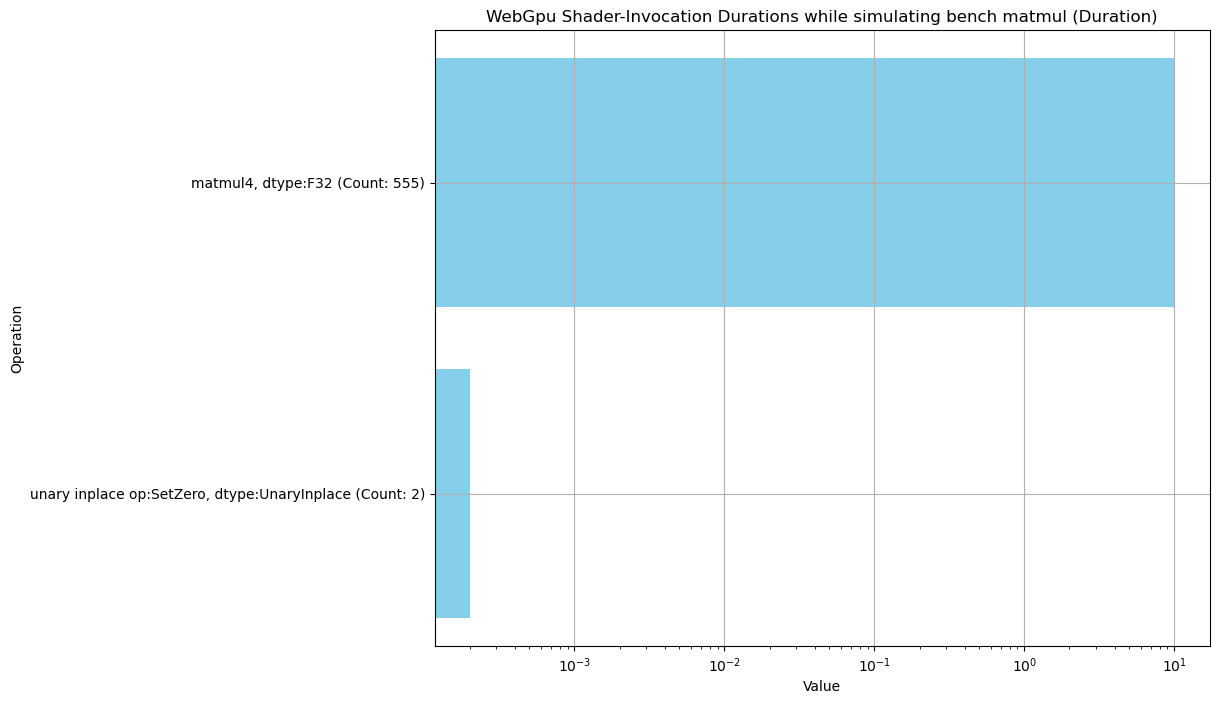

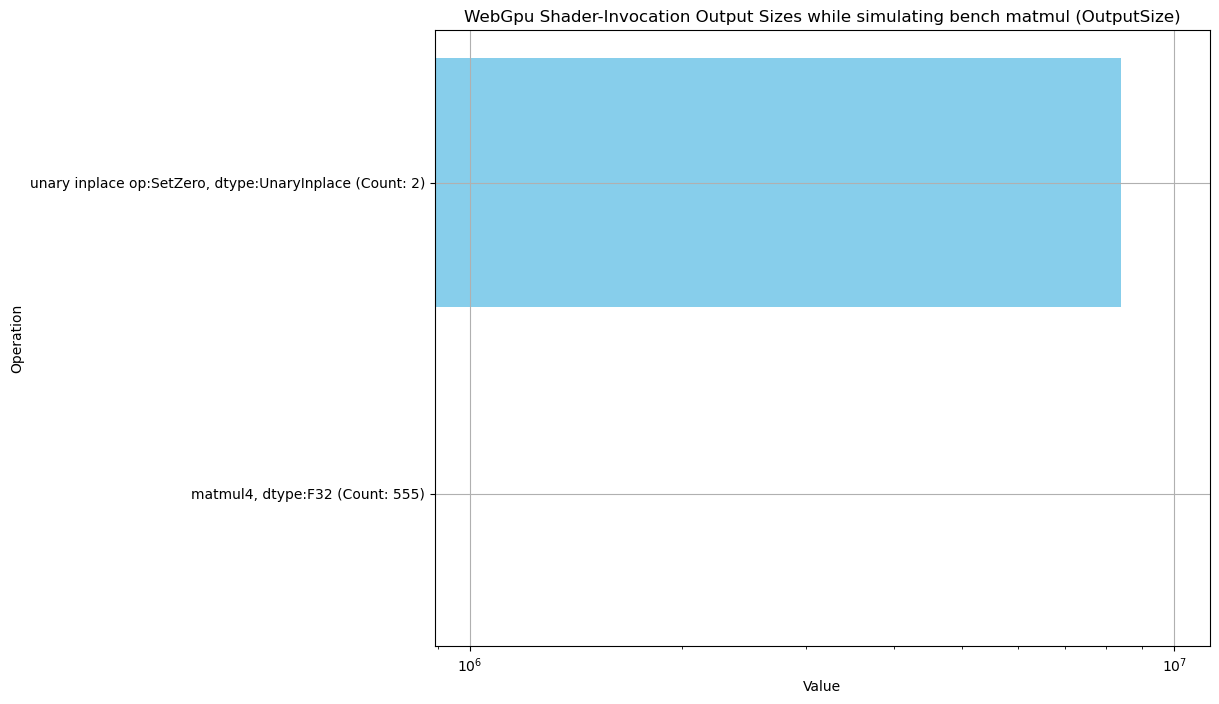

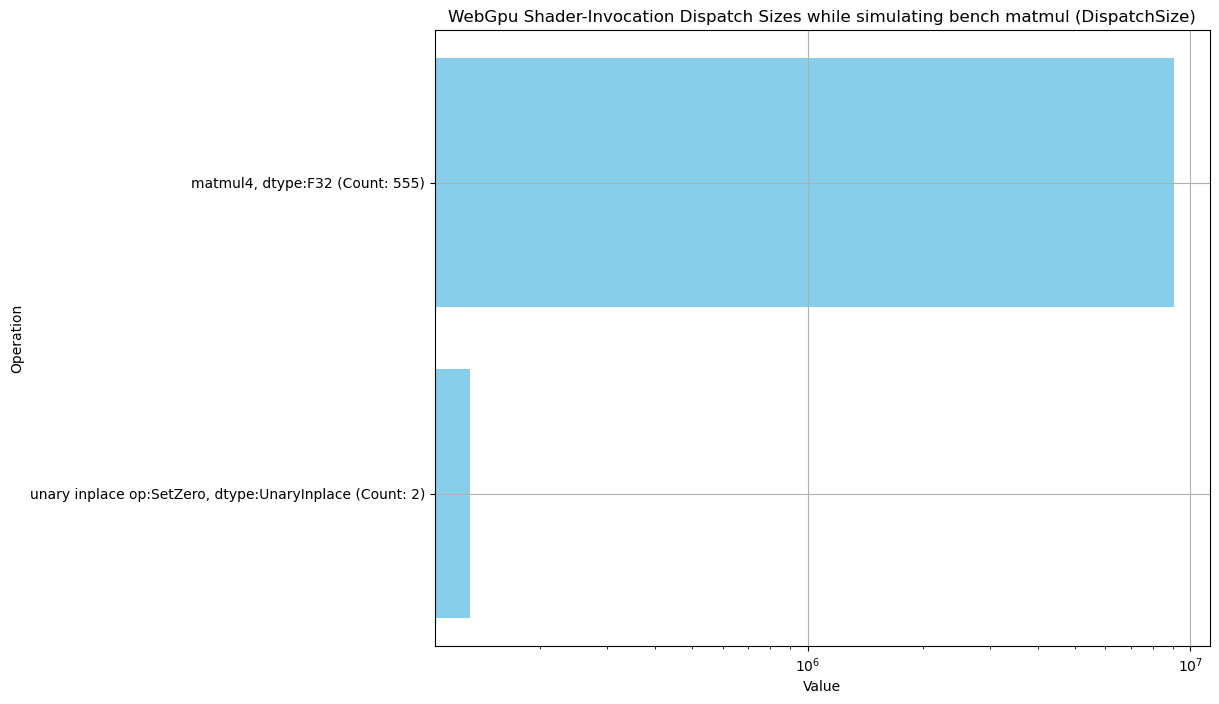

In [6]:
# Load JSON data from a file
with open('candle-core\wgpu_bench2048.json', 'r') as file:
    data = json.load(file)

analyse_file(data,"bench matmul")

In [7]:
import numpy as np

def matmul(global_id, op_matmul, v_input1, v_input2):
    x = global_id[0] * 4
    y = global_id[1] * 4
    batch = global_id[2]

    if x >= op_matmul[3]:
        return
    if y >= op_matmul[1]:
        return

    output_size_of_one_batch = op_matmul[1] * op_matmul[3]

    input1_offset = op_matmul[7]
    input2_offset = op_matmul[11]

    input1_stride_b = op_matmul[6]
    input1_stride_m = op_matmul[5]
    input1_stride_n = op_matmul[4]

    input2_stride_b = op_matmul[10]
    input2_stride_n = op_matmul[9]
    input2_stride_k = op_matmul[8]

    m_input1_offset = input1_offset + input1_stride_m * y + batch * input1_stride_b
    m_input2_offset = input2_offset + input2_stride_k * x + batch * input2_stride_b

    a = np.zeros((4, 4), dtype=np.float32)
    b = np.zeros((4, 4), dtype=np.float32)
    c = np.zeros((4, 4), dtype=np.float32)

    count = (op_matmul[2] + 3) // 4

    for t in range(count):
        # load tiles:
        for ix in range(4):
            ix2 = ix + t * 4
            for iy in range(4):
                iy2 = iy + t * 4
                a_x = input1_stride_n * ix2 + input1_stride_m * iy + m_input1_offset
                b_x = input2_stride_n * iy2 + input2_stride_k * ix + m_input2_offset

                if ix2 >= op_matmul[2] or y + iy >= op_matmul[1]:
                    a[iy][ix] = 0.0
                else:
                    a[iy][ix] = v_input1[a_x]

                if iy2 >= op_matmul[2] or x + ix >= op_matmul[3]:
                    b[iy][ix] = 0.0
                else:
                    b[iy][ix] = v_input2[b_x]

        # add to c
        c += np.dot(b, a)

    dest_offset = batch * output_size_of_one_batch + y * op_matmul[3] + x
    for ix in range(4):
        for iy in range(4):
            if ix + x < op_matmul[3] and iy + y < op_matmul[1]:
                v_dest[dest_offset + ix + iy * op_matmul[3]] = c[iy][ix]

# Define a mock setup for testing purposes
#op_matmul = [1, 2, 2, 2, 1, 2, 1, 0, 1, 2, 1, 0]  # Example values
#v_input1 = np.array([1.0, 2.0, 3.0, 4.0]) # Example input tensor 1
#v_input2 = np.array([1.0, 2.0, 3.0, 4.0])  # Example input tensor 2

op_matmul = [1, 2, 1, 2, 1, 1, 1, 0, 1, 2, 1, 0]  # Example values
v_input1 = np.array([1.0, 2.0]) # Example input tensor 1
v_input2 = np.array([3.0, 4.0])  # Example input tensor 2


v_dest = np.zeros(4, dtype=np.float32)  # Example destination tensor
global_id = [0, 0, 0]  # Example global_id


# Run the function

for x in range(8):
    for y in range(8):
        matmul([x,y,0], op_matmul, v_input1, v_input2)

# Output result
print(v_dest.reshape((2,2)))

[[11.  0.]
 [ 0.  0.]]


In [8]:
import numpy as np

def workgroupBarrier():
    pass  # No operation needed for barrier in Python single-threaded context

# Workgroup shared memory (simulated)
Asub = np.zeros((16, 16), dtype=np.float32)
Bsub = np.zeros((16, 16), dtype=np.float32)

ZERO = 0.0
TS = 16

def matmul3(global_id, local_id, op_matmul, v_input1, v_input2, v_dest, counter):
    gx = global_id[0]
    gy = global_id[1]
    
    lx = local_id[0]
    ly = local_id[1]

    batch = global_id[2]

    output_size_of_one_batch = op_matmul[1] * op_matmul[3]

    input1_offset = op_matmul[7]
    input2_offset = op_matmul[11]

    input1_stride_b = op_matmul[6]
    input1_stride_m = op_matmul[5]
    input1_stride_k = op_matmul[4]

    input2_stride_b = op_matmul[10]
    input2_stride_n = op_matmul[8]
    input2_stride_k = op_matmul[9]

    m_input1_offset = input1_offset + input1_stride_m * gy + batch * input1_stride_b
    m_input2_offset = input2_offset + input2_stride_n * gx + batch * input2_stride_b

    numTiles = op_matmul[2] // 16  # may be 0, if k is smaller than 16

    acc = ZERO
    for t in range(0, op_matmul[2] , TS):
        tiledX = 16 * t + lx
        tiledY = 16 * t + ly

        
        if (tiledX < op_matmul[2] and gy < op_matmul[1]):
            Asub[lx, ly] = v_input1[m_input1_offset + tiledX * input1_stride_k]
        else:
            Asub[lx, ly] = 0
        if (tiledY < op_matmul[2] and gx < op_matmul[3]):
            Bsub[lx, ly] = v_input2[m_input2_offset + tiledY * input2_stride_k]
        else:
            Bsub[lx, ly] = 0

        
        if gx >= op_matmul[3]:
            return
        if gy >= op_matmul[1]:
            return

        


        if counter < TS * TS:
            return

        for k in range(16):
            acc += Asub[k, ly] * Bsub[lx, k]

    v_dest[batch * output_size_of_one_batch + gy * op_matmul[3] + gx] = acc



# Define a mock setup for testing purposes
#op_matmul = [1, 2, 2, 2, 1, 2, 1, 0, 1, 2, 1, 0]  # Example values
#v_input1 = np.array([1.0, 2.0, 3.0, 4.0]) # Example input tensor 1
#v_input2 = np.array([1.0, 2.0, 3.0, 4.0])  # Example input tensor 2

#op_matmul = [1, 2, 1, 2, 1, 1, 1, 0, 1, 2, 1, 0]  # Example values
#v_input1 = np.array([1.0, 2.0]) # Example input tensor 1
#v_input2 = np.array([3.0, 4.0])  # Example input tensor 2

op_matmul = [1, 2, 3, 2, 1, 3, 1, 0, 1, 2, 1, 0]  # Example values
v_input1 = np.array([0.0, 1.0, 2.0, 3.0, 4.0, 5.0]) # Example input tensor 1
v_input2 = np.array([2.0, 3.0, 4.0, 5.0, 6.0, 7.0])  # Example input tensor 2

v_dest = np.zeros(4, dtype=np.float32)  # Example destination tensor
global_id = [0, 0, 0]  # Example global_id


# Run the function
counter = 0
for x in range(16):
    for y in range(16):
        matmul3([x,y,0],[x,y,0], op_matmul, v_input1, v_input2, v_dest, counter)
        counter += 1

for x2 in range(16):
    for y2 in range(16):
        matmul3([x2,y2,0],[x2,y2,0], op_matmul, v_input1, v_input2, v_dest, counter)
        counter += 1

# Output result
print(v_dest.reshape((2,2)))


[[16. 19.]
 [52. 64.]]


In [9]:
import numpy as np

ZERO = 0

Asub = np.zeros((16, 16), dtype=np.float32)
Bsub = np.zeros((16, 16), dtype=np.float32)
def matmul4_end(op_matmul, v_input1, v_input2, v_dest, global_id, local_id, counter):
    if global_id[0] < op_matmul[12] and global_id[1] < op_matmul[13]:
        return
    
    gx = global_id[0]
    gy = global_id[1]
    
    lx = local_id[0]
    ly = local_id[1]

    batch = global_id[2]
  
    output_size_of_one_batch = op_matmul[1] * op_matmul[3]

    input1_offset = op_matmul[7]
    input2_offset = op_matmul[11]

    input1_stride_b = op_matmul[6]
    input1_stride_m = op_matmul[5]
    input1_stride_k = op_matmul[4]

    input2_stride_b = op_matmul[10]
    input2_stride_n = op_matmul[8]
    input2_stride_k = op_matmul[9]

    m_input1_offset = input1_offset + input1_stride_m * gy + batch * input1_stride_b
    m_input2_offset = input2_offset + input2_stride_n * gx + batch * input2_stride_b

    if gy >= op_matmul[1] and gx >= op_matmul[3]:
        return

    acc = ZERO
    for t in range(0, op_matmul[2], 16):
        if gy < op_matmul[1]:
            tiledX = t + lx
            if tiledX < op_matmul[2]:
                Asub[lx, ly] = v_input1[m_input1_offset + tiledX * input1_stride_k]
        
        if gx < op_matmul[3]:
            tiledY = t + ly
            if tiledY < op_matmul[2]:
                Bsub[ly, lx] = v_input2[m_input2_offset + tiledY * input2_stride_k]

        if counter:
            return

        if gy < op_matmul[1] and gx < op_matmul[3]:
            count = min(op_matmul[2] - t, 16)
            for k in range(count):
                acc += Asub[k, ly] * Bsub[k, lx]

    if gy < op_matmul[1] and gx < op_matmul[3]:
        v_dest[batch * output_size_of_one_batch + gy * op_matmul[3] + gx] = acc

# Example usage with dummy data
size = 17
op_matmul = np.array([1, size,size,size, 1, size, 1, 0, 1, size, 1, 0,16,16], dtype=np.uint32)
v_input1 = np.arange(0, size*size).astype(np.float32)
v_input2 = np.arange(0, size*size).astype(np.float32)
v_dest = np.zeros((size*size), dtype=np.float32)


#for wx in range(2):
wx = 0
wy = 1
for wx in range(2):
    for wy in range(2):
        for x in range(16):
            for y in range(16):
                matmul4_end(op_matmul, v_input1, v_input2,v_dest, (wx*16+x,wy*16+y,0), (x,y,0), True)

        for x2 in range(16):
            for y2 in range(16):
                matmul4_end(op_matmul, v_input1, v_input2,v_dest, (wx*16+x2,wy*16+y2,0), (x2,y2,0), False)

print(v_dest.reshape(size,size))

[[     0.      0.      0.      0.      0.      0.      0.      0.      0.
       0.      0.      0.      0.      0.      0.      0.  27608.]
 [     0.      0.      0.      0.      0.      0.      0.      0.      0.
       0.      0.      0.      0.      0.      0.      0.  76160.]
 [     0.      0.      0.      0.      0.      0.      0.      0.      0.
       0.      0.      0.      0.      0.      0.      0. 124712.]
 [     0.      0.      0.      0.      0.      0.      0.      0.      0.
       0.      0.      0.      0.      0.      0.      0. 173264.]
 [     0.      0.      0.      0.      0.      0.      0.      0.      0.
       0.      0.      0.      0.      0.      0.      0. 221816.]
 [     0.      0.      0.      0.      0.      0.      0.      0.      0.
       0.      0.      0.      0.      0.      0.      0. 270368.]
 [     0.      0.      0.      0.      0.      0.      0.      0.      0.
       0.      0.      0.      0.      0.      0.      0. 318920.]
 [     0.    

In [10]:
def parse_data(data):
    """
    Parses the data and extracts relevant information.
    Assumes data is a list of strings.
    """
    bindgroup_creation = {}
    
    open_buffers = {}

    buffer_reuse = {}
    buffer_create = {}
    buffer_dropped = {}
   
    counter = 0 
    for line in data:
        if "Buffer Reuse" in line:
            data = line.split(" ")
            _, _, buffer_id, _, reference_id = data
            open_buffers[int(buffer_id)] = int(reference_id)
            buffer_reuse[(int(reference_id), counter)] = int(buffer_id)
        elif "Bindgroup Create Cached" in line:
            data = line.split(":")
            _, bindgroup, reference_id, pipeline = data
            bindgroup = bindgroup.replace(", reference_dest id", "")
            reference_id = reference_id.replace(", pipeline", "")
            bindgroup_creation[int(reference_id)] = pipeline.strip()
        elif "Buffer Create" in line:
            data = line.split(" ")
            _, _, buffer_id, _, reference_id = data
            buffer_create[(int(reference_id), counter)] = int(buffer_id)
            open_buffers[int(buffer_id)] = int(reference_id)
        elif "Buffer Cache" in line:
            data = line.split(" ")
            _, _, buffer_id, _, _, reference_id = data
            buffer_dropped[(int(reference_id), counter)] = int(buffer_id)
            #open_buffers.pop(int(buffer_id), None)
        elif "START CACHE" in line:
            counter += 1
    
    

    for key in open_buffers:
        buffer = open_buffers[key]
        if buffer in bindgroup_creation:
            print(f"buffer {key} refrenced by {buffer}({bindgroup_creation[buffer]})")
        else:
            print(f"buffer {key} refrenced by {buffer}")




    return buffer_reuse, bindgroup_creation

def analyze_data(buffer_reuse, bindgroup_creation):
    """
    Analyzes the data to identify patterns.
    """
    # Your analysis logic here
    # For example, check if certain buffers are reused frequently or if specific bindgroups are recreated often.

    # Print results (you can customize this part)
    print("Buffer Reuse:")
    for buffer_id, reference_id in buffer_reuse.items():
        print(f"Buffer {buffer_id} reused for Reference {reference_id}")

    print("\nBindgroup Creation:")
    for reference_id, pipeline in bindgroup_creation.items():
        print(f"Reference {reference_id}: Pipeline {pipeline}")

if __name__ == "__main__":
    with open("candle-examples/debug-llama2c.txt") as file:
        data = file.read()
    data = data.split("\n")
    # # Example data (replace with your actual data)
    # data = [
    #     "Buffer Reuse 15 for 19",
    #     # ... other lines ...
    #     "Bindgroup Create Cached: 535, reference_dest id: 27, pipeline: PipelineType(Binary(F32), ...)",
    # ]

    buffer_reuse, bindgroup_creation = parse_data(data)
    #analyze_data(buffer_reuse, bindgroup_creation)

FileNotFoundError: [Errno 2] No such file or directory: 'candle-examples/debug-llama2c.txt'

Total sum for Duration: 74.14420787199998
Operations sorted by total duration for Duration:
Operation: matmul_linex, dtype:F32, pipeline PipelineType(Matmul(F32), Matmul1endSmallNoStrideV1K_x), Duration: 39.506388992, Count: 3032 Perc:53.28%
Operation: matmul5, dtype:F32, Duration: 14.670314496, Count: 4184 Perc:19.79%
Operation: conv2d, kernel:F32 dtype:[1, 1, 3, 3], Duration: 8.595392512, Count: 589824 Perc:11.59%
Operation: copy2d dtype:F32, Duration: 6.195528703999999, Count: 589874 Perc:8.36%
Operation: softmax, dtype:F32, Duration: 1.59027712, Count: 384 Perc:2.14%
Operation: binary op:Add, dtype:F32, pipeline:BinaryBufferFromBuffer, Duration: 0.9339944960000001, Count: 5451 Perc:1.26%
Operation: reduce op:Sum, dtype:F32, Duration: 0.5630208, Count: 2774 Perc:0.76%
Operation: binary op:Mult, dtype:F32, pipeline:BinaryBufferFromBuffer, Duration: 0.5450721279999999, Count: 1343 Perc:0.74%
Operation: copy strided dtype:F32, Duration: 0.46566399999999997, Count: 4192 Perc:0.63%
Opera

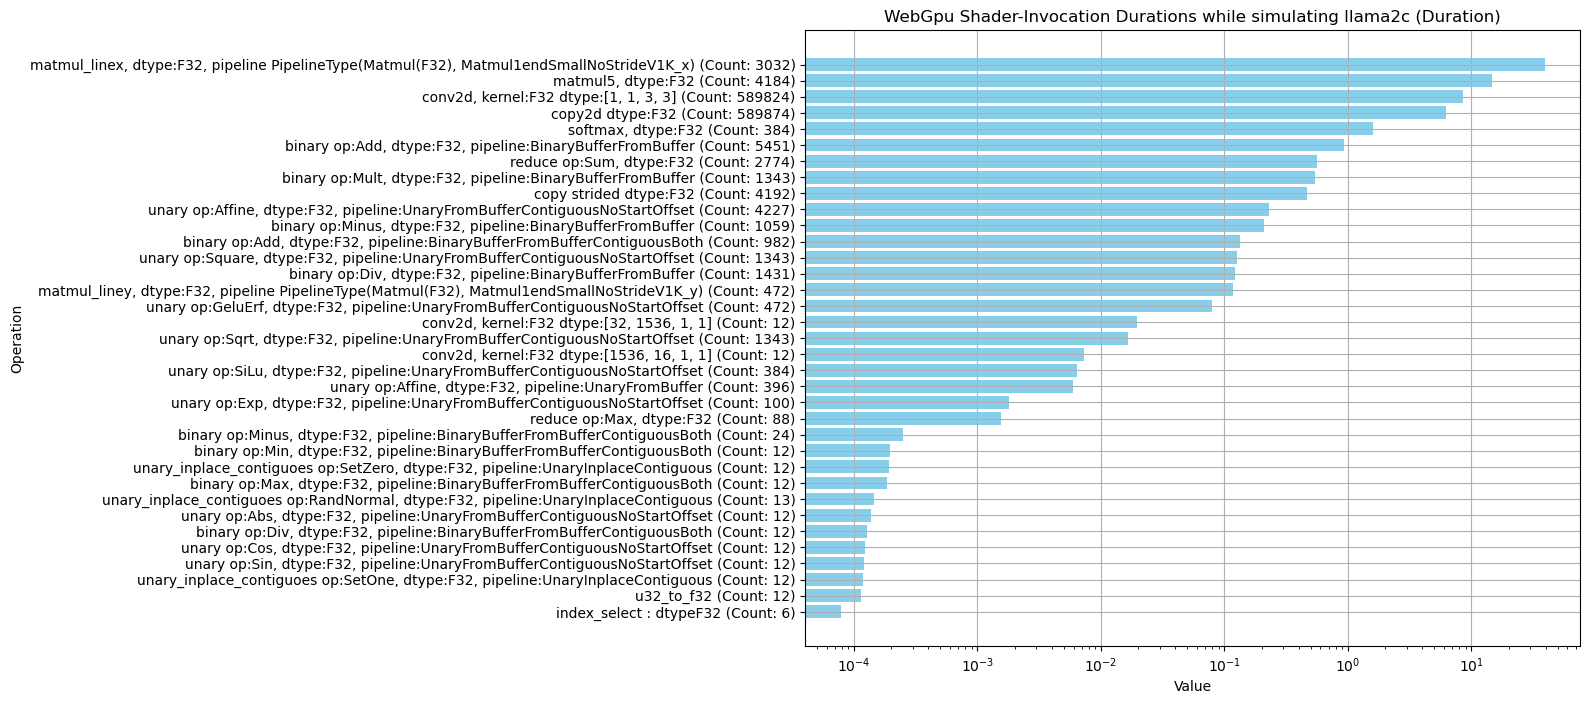

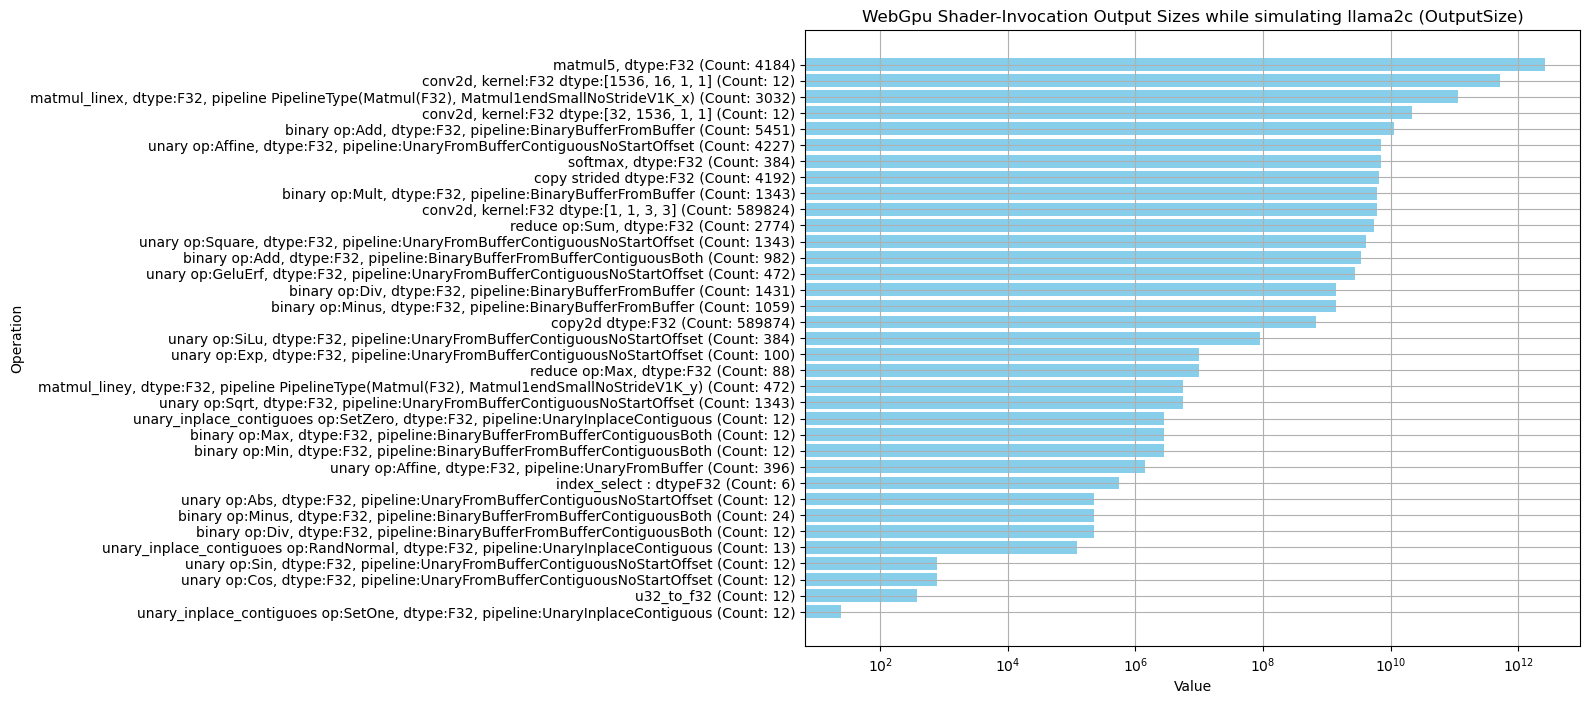

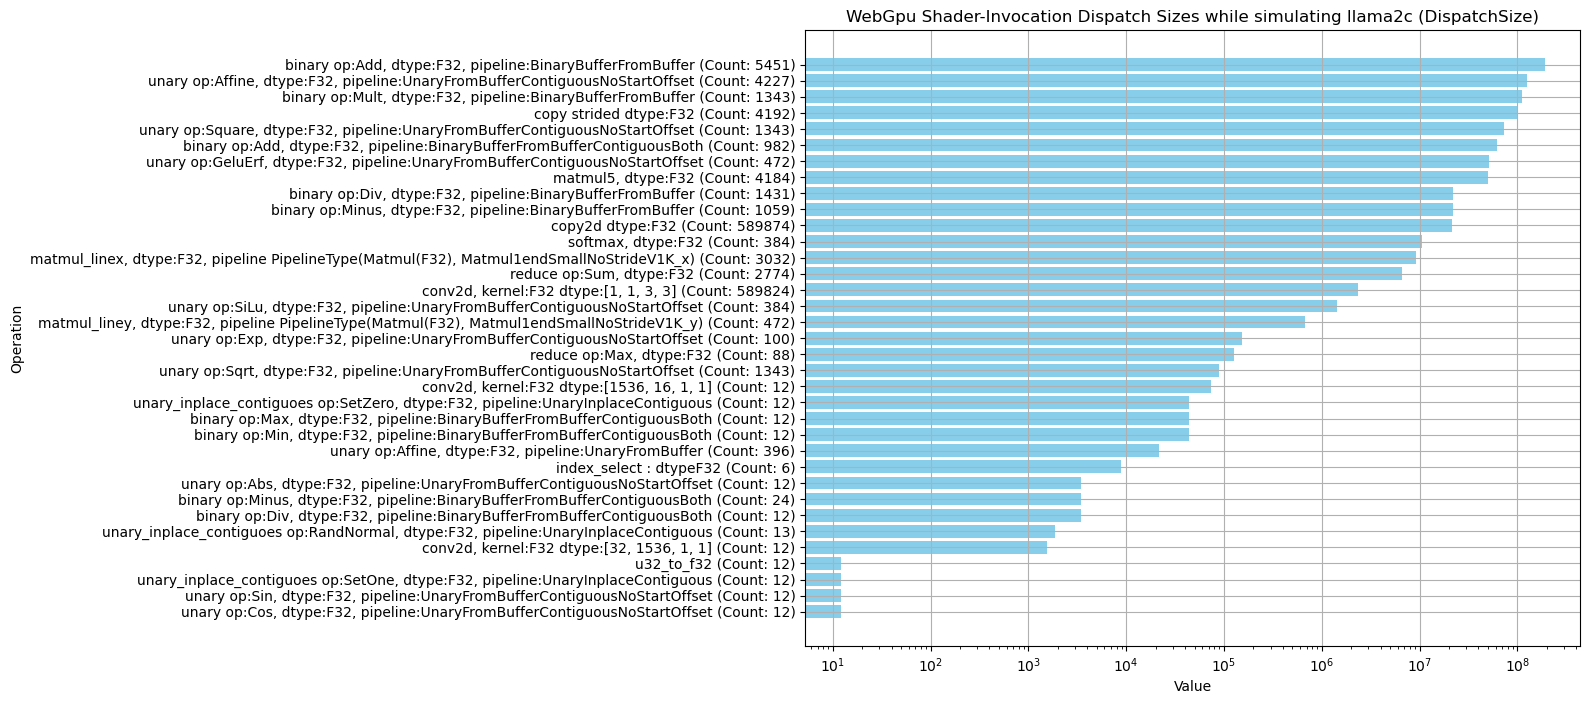

In [ ]:
# Load JSON data from a file
with open('candle-examples\wgpu_infowuerstchen1b_small.json', 'r') as file:
    data = json.load(file)

analyse_file(data,"llama2c")

Total sum for Duration: 1.4134845120000004
Operations sorted by total duration for Duration:
Operation: matmul, dtype:F32, Duration: 0.5636126720000001, Count: 14026 Perc:39.87%
Operation: binary op:Mult, dtype:F32, pipeline:BinaryBufferFromBuffer, Duration: 0.23110553600000003, Count: 12240 Perc:16.35%
Operation: copy2d dtype:F32, Duration: 0.16915452800000003, Count: 12216 Perc:11.97%
Operation: binary op:Add, dtype:F32, pipeline:BinaryBufferFromBufferContiguousBoth, Duration: 0.077666272, Count: 6120 Perc:5.49%
Operation: rms_norm, dtype:F32, Duration: 0.049708064, Count: 3315 Perc:3.52%
Operation: copy strided dtype:F32, Duration: 0.048789504, Count: 3048 Perc:3.45%
Operation: binary op:Minus, dtype:F32, pipeline:BinaryBufferFromBufferContiguousBoth, Duration: 0.040830976, Count: 3066 Perc:2.89%
Operation: unary op:Affine, dtype:F32, pipeline:UnaryFromBufferContiguousNoStartOffset, Duration: 0.03961344000000001, Count: 3060 Perc:2.80%
Operation: unary op:Exp, dtype:F32, pipeline:Un

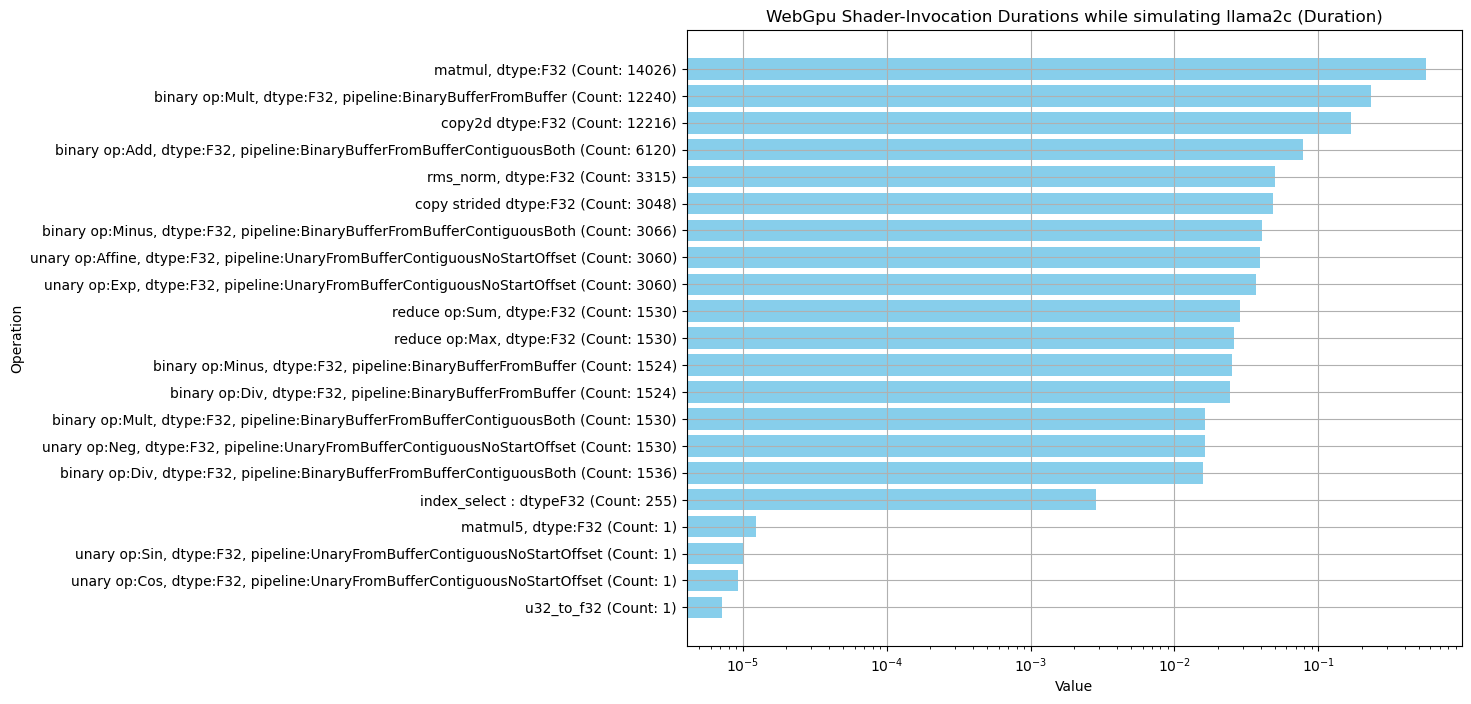

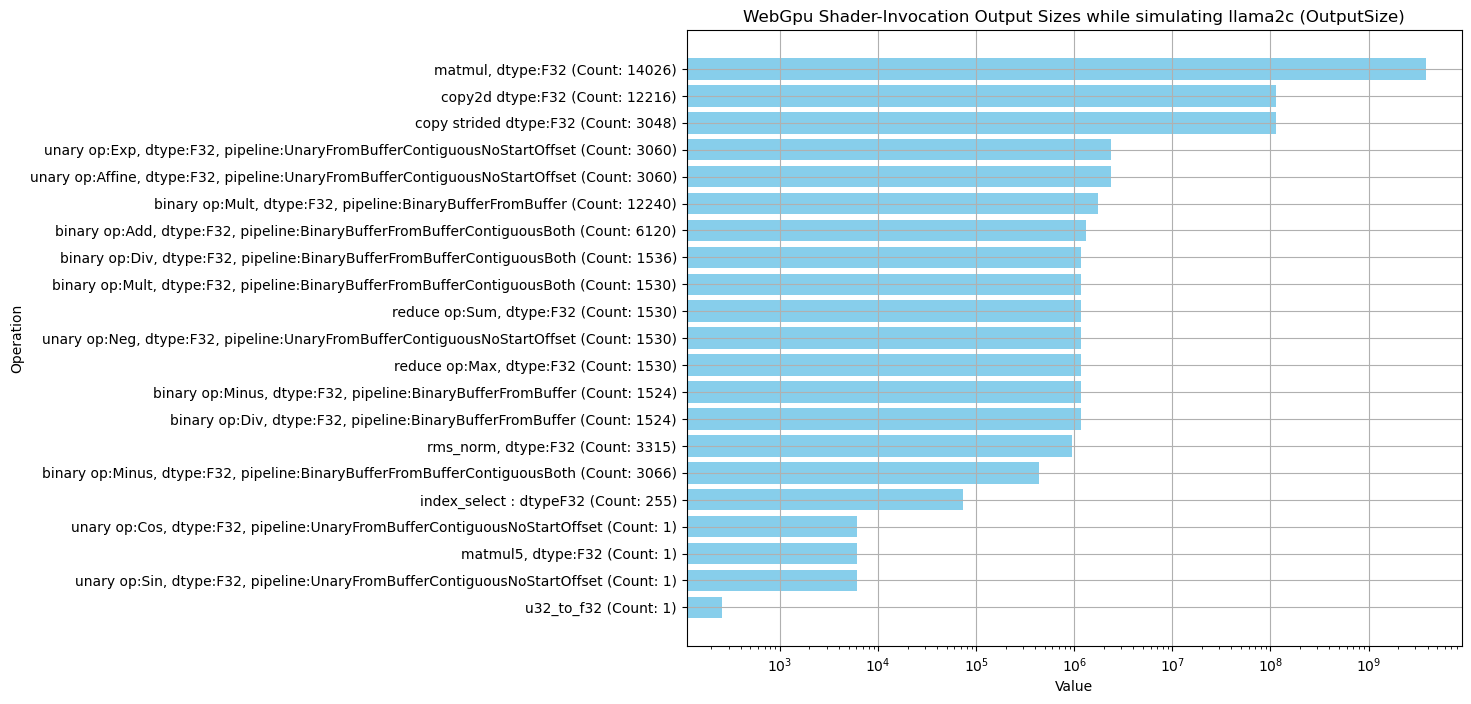

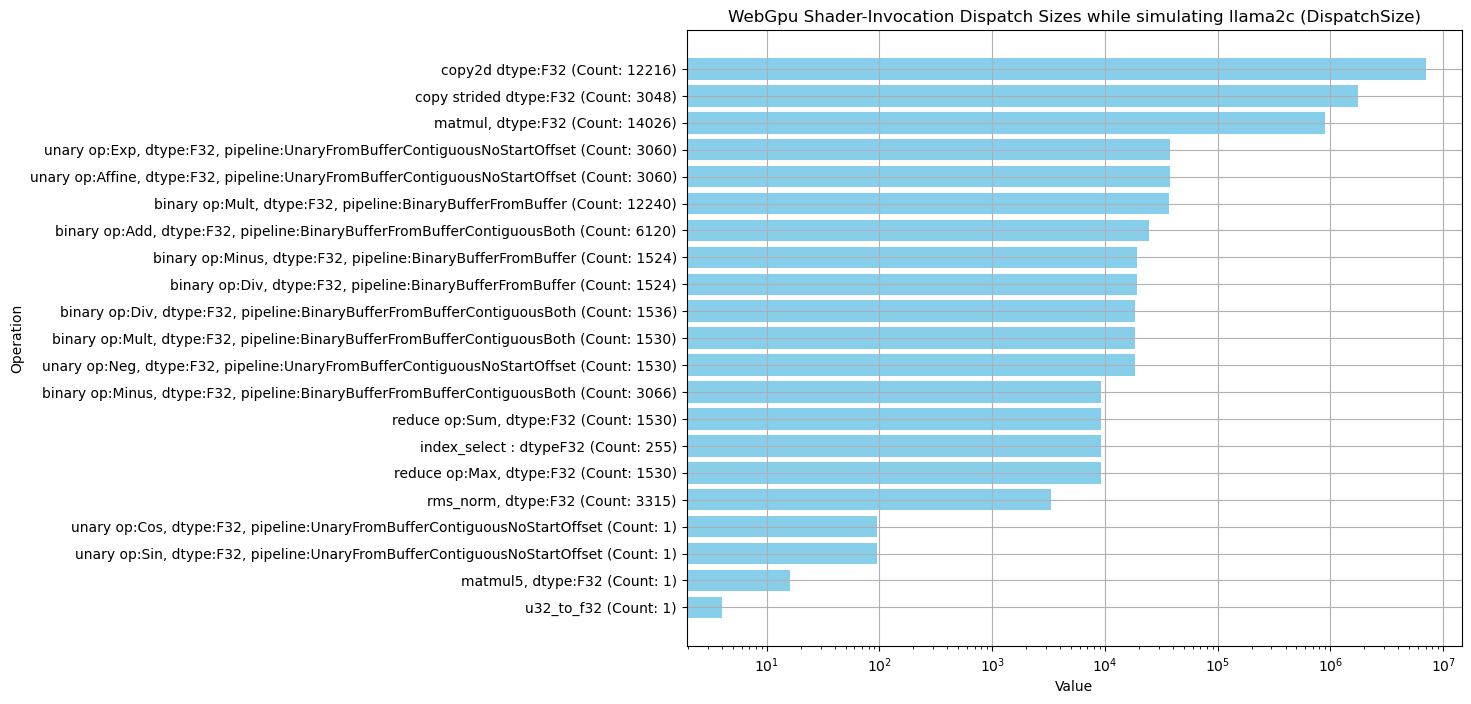

In [13]:
# Load JSON data from a file
with open('wgpu_infollama4-c_small.json', 'r') as file:
    data = json.load(file)

analyse_file(data,"llama2c")